## 0.0 Imports

In [182]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import statsmodels.api as sm

## 0.1 Load data

In [183]:
df = pd.read_csv('dataset/df_ready.csv')

In [184]:
df.head(1)

,Unnamed: 0,Date_imp,Date_imp_d,Cluster,Category_name,name,price,disc_price,merchant,condition,...,sourceURLs,weight,Date_imp_d.1,Day_n,month,month_n,day,Week_Number,Zscore_1,price_std
0,4,2017-12-14 06:00:00,2017/12/14,35,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,64.99,Walmart.com,New,...,https://www.walmart.com/ip/BOYTONE-BT210FB-BLA...,14 pounds,2017/12/14,Thursday,12,December,14,50,0.001525,3.880725


## 1.0 Data description

In [185]:
df1 = df.copy()

### 1.1 Data dimension

In [186]:
print(f'Number of rows: {df1.shape[0]}')
print(f'Number of columns: {df1.shape[1]}')

Number of rows: 23151
Number of columns: 32


### 1.2 Data types

In [187]:
df1.dtypes

Unnamed: 0           int64
Date_imp            object
Date_imp_d          object
Cluster              int64
Category_name       object
name                object
price              float64
disc_price         float64
merchant            object
condition           object
Disc_percentage    float64
isSale              object
Imp_count            int64
brand               object
p_description       object
currency            object
dateAdded           object
dateSeen            object
dateUpdated         object
imageURLs           object
manufacturer        object
shipping            object
sourceURLs          object
weight              object
Date_imp_d.1        object
Day_n               object
month                int64
month_n             object
day                  int64
Week_Number          int64
Zscore_1           float64
price_std          float64
dtype: object

### 1.3 Check NA

In [188]:
df1.isna().sum()

Unnamed: 0             0
Date_imp               0
Date_imp_d             0
Cluster                0
Category_name          0
name                   0
price                  0
disc_price             0
merchant               0
condition              0
Disc_percentage        0
isSale                 0
Imp_count              0
brand                  0
p_description          0
currency               0
dateAdded              0
dateSeen               0
dateUpdated            0
imageURLs          22696
manufacturer       10639
shipping           11497
sourceURLs          4930
weight                68
Date_imp_d.1           0
Day_n                  0
month                  0
month_n                0
day                    0
Week_Number            0
Zscore_1             171
price_std              0
dtype: int64

### 1.4 Check column name and remove the columns that we are not going to use

In [189]:
df1.columns

Index(['Unnamed: 0', 'Date_imp', 'Date_imp_d', 'Cluster', 'Category_name',
       'name', 'price', 'disc_price', 'merchant', 'condition',
       'Disc_percentage', 'isSale', 'Imp_count', 'brand', 'p_description',
       'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
       'manufacturer', 'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1',
       'Day_n', 'month', 'month_n', 'day', 'Week_Number', 'Zscore_1',
       'price_std'],
      dtype='object')

In [190]:
df1 = df1.drop(columns={'Unnamed: 0', 'Date_imp', 'Cluster','disc_price', 'condition',
                        'Disc_percentage', 'isSale', 'Imp_count','p_description',
                        'currency', 'dateAdded', 'dateSeen', 'dateUpdated', 'imageURLs',
                        'shipping', 'sourceURLs', 'weight', 'Date_imp_d.1','Zscore_1','price_std'})

In [191]:
df1.head(10)

,Date_imp_d,Category_name,name,price,merchant,brand,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017/12/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,Walmart.com,Boytone,Boytone,Thursday,12,December,14,50
1,2017/09/08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.00,Walmart.com,Boytone,Boytone,Friday,9,September,8,36
2,2017/10/24,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.00,Walmart.com,Boytone,Boytone,Tuesday,10,October,24,43
3,2017/08/15,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,74.99,Walmart.com,Boytone,Boytone,Tuesday,8,August,15,33
4,2017/09/14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,Walmart.com,Boytone,Boytone,Thursday,9,September,14,37
5,2017/07/23,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,64.99,Walmart.com,Boytone,Boytone,Sunday,7,July,23,29
6,2017/10/10,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.99,Bestbuy.com,Boytone,Boytone,Tuesday,10,October,10,41
7,2017/08/28,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,66.99,Bestbuy.com,Boytone,Boytone,Monday,8,August,28,35
8,2017/08/12,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,65.99,Bestbuy.com,Boytone,Boytone,Saturday,8,August,12,32
9,2017/08/01,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,64.99,Bestbuy.com,Boytone,Boytone,Tuesday,8,August,1,31


In [192]:
df1.shape

(23151, 12)

### 1.5 Change types

In [193]:
df1['Date_imp_d'] = pd.to_datetime(df1['Date_imp_d'])

In [194]:
df1.dtypes

Date_imp_d       datetime64[ns]
Category_name            object
name                     object
price                   float64
merchant                 object
brand                    object
manufacturer             object
Day_n                    object
month                     int64
month_n                  object
day                       int64
Week_Number               int64
dtype: object

### 1.6 Descriptive statistics

In [195]:
num_attributes = df1.select_dtypes(include=['float64', 'int64'])
cat_attributes = df1.select_dtypes(exclude=['float64', 'int64', 'datetime64[ns]'])

In [196]:
cat_attributes

,Category_name,name,merchant,brand,manufacturer,Day_n,month_n
0,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Boytone,Boytone,Thursday,December
1,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Boytone,Boytone,Friday,September
2,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Boytone,Boytone,Tuesday,October
3,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Boytone,Boytone,Tuesday,August
4,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,Walmart.com,Boytone,Boytone,Thursday,September
...,...,...,...,...,...,...,...
23146,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Bestbuy.com,naxa,Naxa,Thursday,June
23147,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Walmart.com,naxa,Naxa,Tuesday,August
23148,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Walmart.com,naxa,Naxa,Sunday,July
23149,"sound, speaker, home",naxa - 2.1-Channel Soundbar with 50-Watt Digit...,Walmart.com,naxa,Naxa,Sunday,November


In [197]:
###central tendency
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

###dispersion
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(min)).T
d3 = pd.DataFrame(num_attributes.apply(max)).T
d4 = pd.DataFrame(num_attributes.apply (lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis())).T

In [198]:
n = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
n.columns = ['att','min', 'max','range', 'mean', 'median', 'std', 'skew', 'kurtosis']
n

,att,min,max,range,mean,median,std,skew,kurtosis
0,price,1.0,10879.95,10878.95,513.037803,199.99,859.091448,4.595160,34.411146
1,month,1.0,12.00,11.00,7.651030,8.00,2.592787,-0.099417,-0.628859
2,day,1.0,31.00,30.00,15.693879,16.00,9.681413,0.032258,-1.331838
3,Week_Number,1.0,51.00,50.00,31.342750,32.00,11.316253,-0.266980,-0.648027


## 2.0 Exploratory data analysis (EDA)

In [199]:
df2 = df1.copy()

In [200]:
df2.head(2)

,Date_imp_d,Category_name,name,price,merchant,brand,manufacturer,Day_n,month,month_n,day,Week_Number
0,2017-12-14,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,Walmart.com,Boytone,Boytone,Thursday,12,December,14,50
1,2017-09-08,"speaker, portable, bluetooth",Boytone - 2500W 2.1-Ch. Home Theater System - ...,69.0,Walmart.com,Boytone,Boytone,Friday,9,September,8,36


### 2.1 Questions


#### 2.1.1 Which store has the highest sales volume?

In [201]:
df2[['Date_imp_d', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='Date_imp_d', ascending=False)

,merchant,Date_imp_d
1,Bestbuy.com,11287
4,bhphotovideo.com,5064
2,Walmart.com,3947
5,ebay.com,2809
0,Amazon.com,25
6,kmart.com,17
3,barcodable.com,2


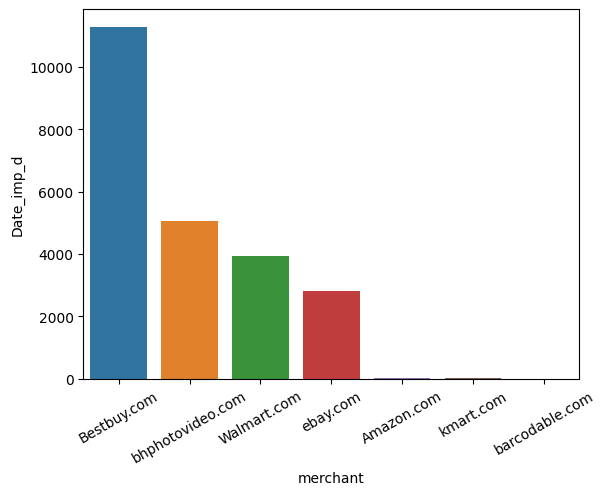

In [202]:
###create the plot
aux1 = df2[['Date_imp_d', 'merchant']].groupby('merchant').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 30)
sns.barplot(x='merchant', y='Date_imp_d', data=aux1);

In [203]:
######select the datasets by stores
df_best = df2[df2['merchant'] == 'Bestbuy.com']
df_bhp = df2[df2['merchant'] == 'bhphotovideo.com']
df_wal = df2[df2['merchant'] == 'Walmart.com']
df_ebay = df2[df2['merchant'] == 'ebay.com']

#### 2.1.2 Which category experiences the highest level of sales?

##### a) The highest level of sales of all categories

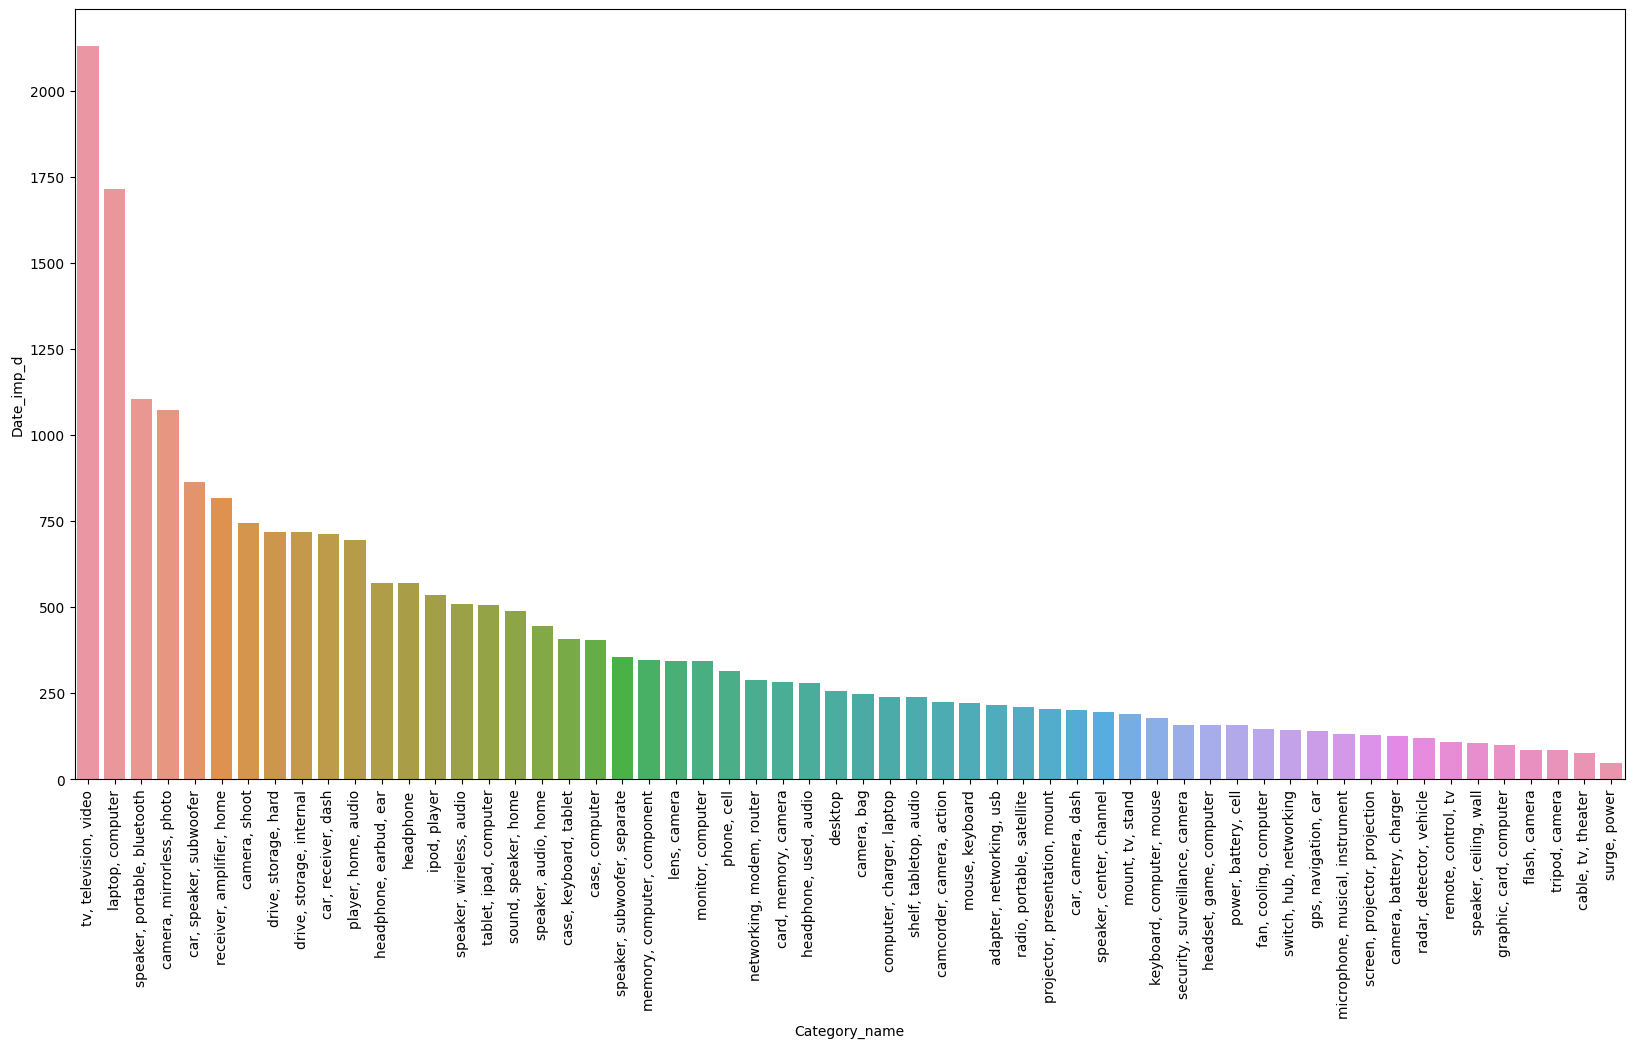

In [204]:
plt.figure(figsize=(20,10))
aux2 = df2[['Date_imp_d', 'Category_name']].groupby('Category_name').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
#aux2
plt.xticks(rotation = 90)
sns.barplot(x='Category_name', y='Date_imp_d', data=aux2);

##### b) Highest level of sales of each category per store

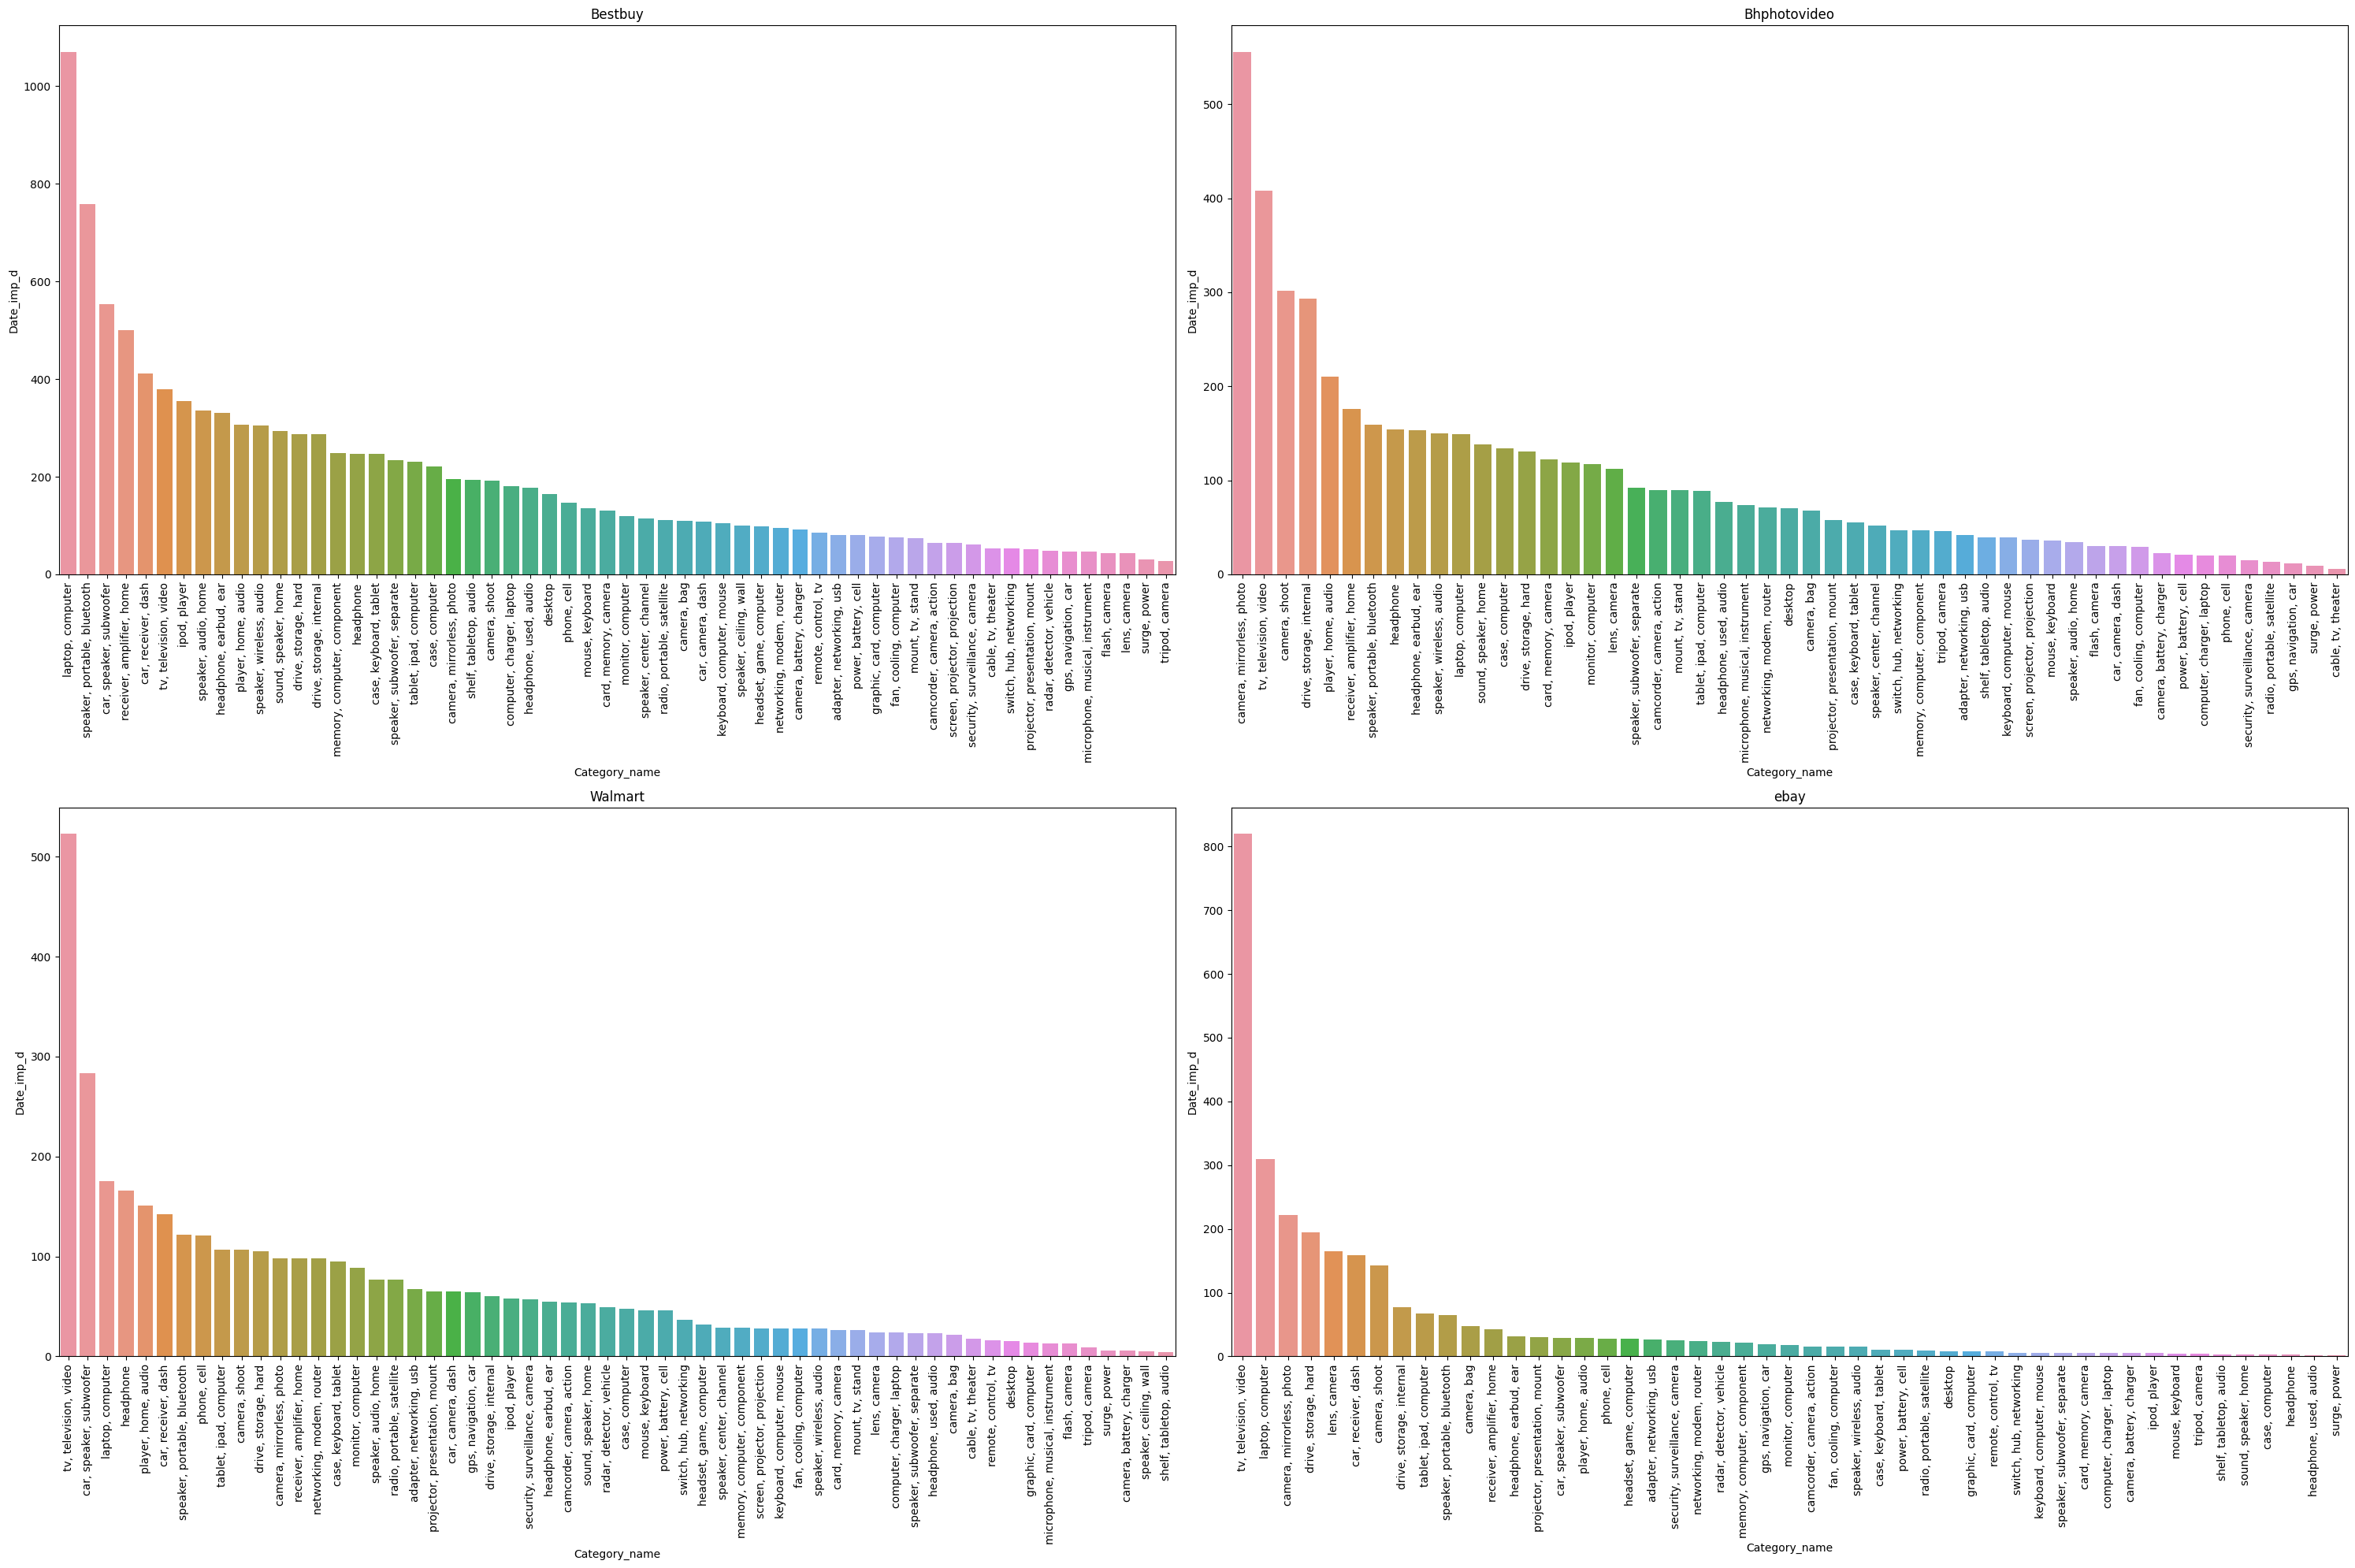

In [205]:
plt.figure(figsize=(30,20))

plt.subplot(2, 2, 1) #index is in which position the plot will be displayed
aux3 = df_best[['Date_imp_d', 'Category_name']].groupby('Category_name').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('Bestbuy')
sns.barplot(x='Category_name', y='Date_imp_d', data=aux3)

plt.subplot(2, 2, 2) #index is in which position the plot will be displayed
aux4 = df_bhp[['Date_imp_d', 'Category_name']].groupby('Category_name').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('Bhphotovideo')
sns.barplot(x='Category_name', y='Date_imp_d', data=aux4)

plt.subplot(2, 2, 3) #index is in which position the plot will be displayed
aux5 = df_wal[['Date_imp_d', 'Category_name']].groupby('Category_name').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('Walmart')
sns.barplot(x='Category_name', y='Date_imp_d', data=aux5)

plt.subplot(2, 2, 4) #index is in which position the plot will be displayed
aux6 = df_ebay[['Date_imp_d', 'Category_name']].groupby('Category_name').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('ebay')
sns.barplot(x='Category_name', y='Date_imp_d', data=aux6)

plt.tight_layout()

#### 2.1.3 Which brand generates the most sales?

##### a) Which brand has the highest level of sales?

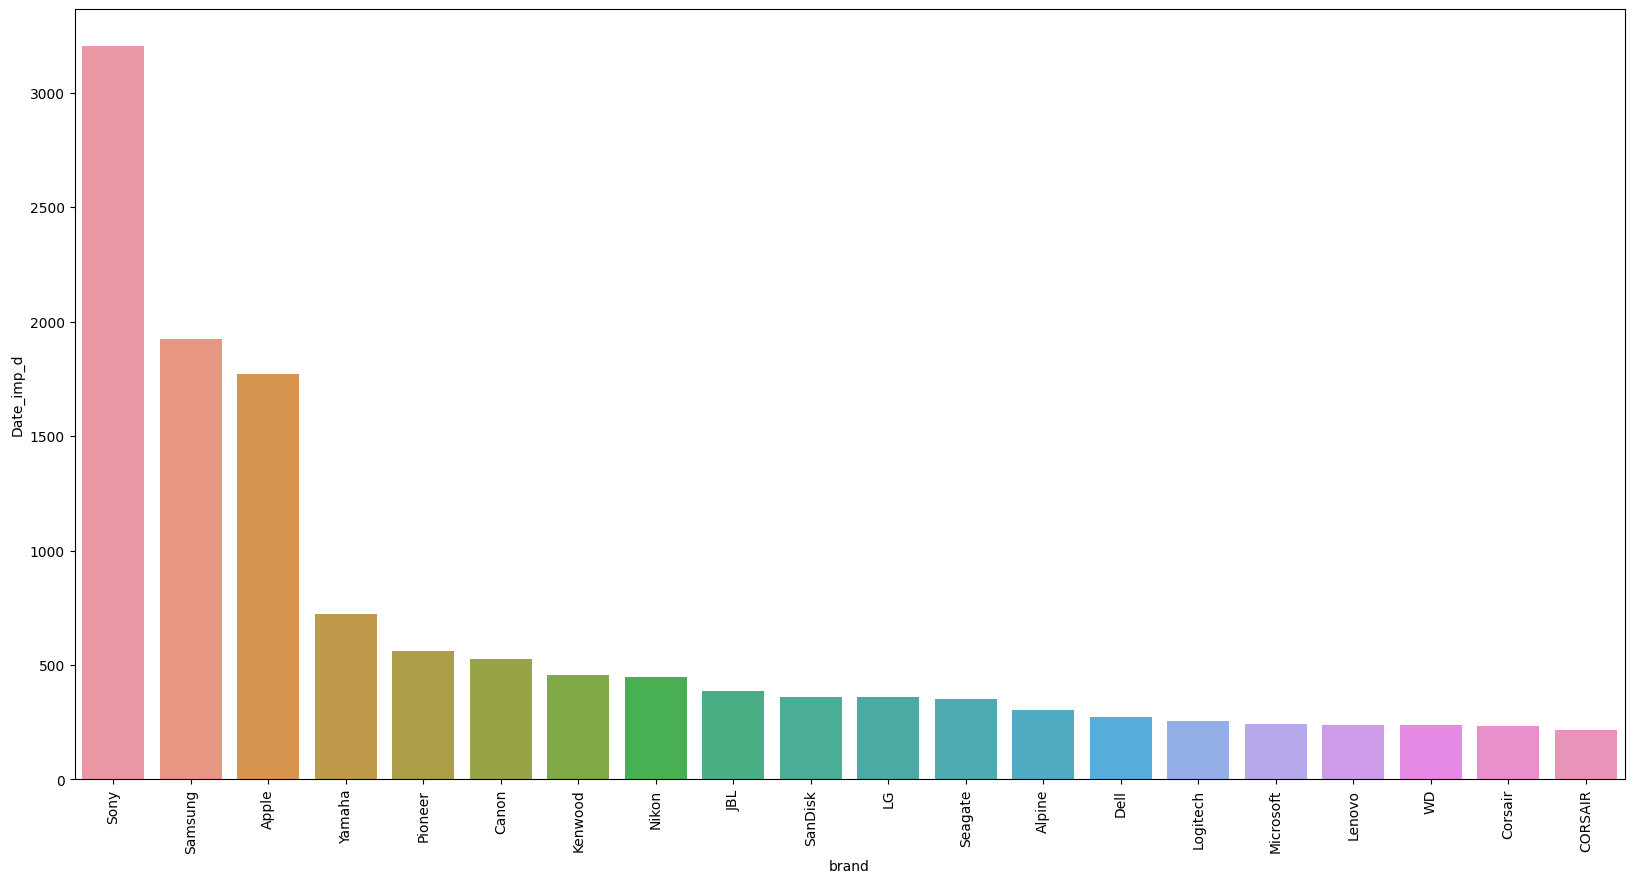

In [206]:
plt.figure(figsize=(20,10))
aux7 = df2[['Date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
#aux2
plt.xticks(rotation = 90)
sns.barplot(x='brand', y='Date_imp_d', data=aux7.head(20));

##### b) Which brand generates the most sales per store?

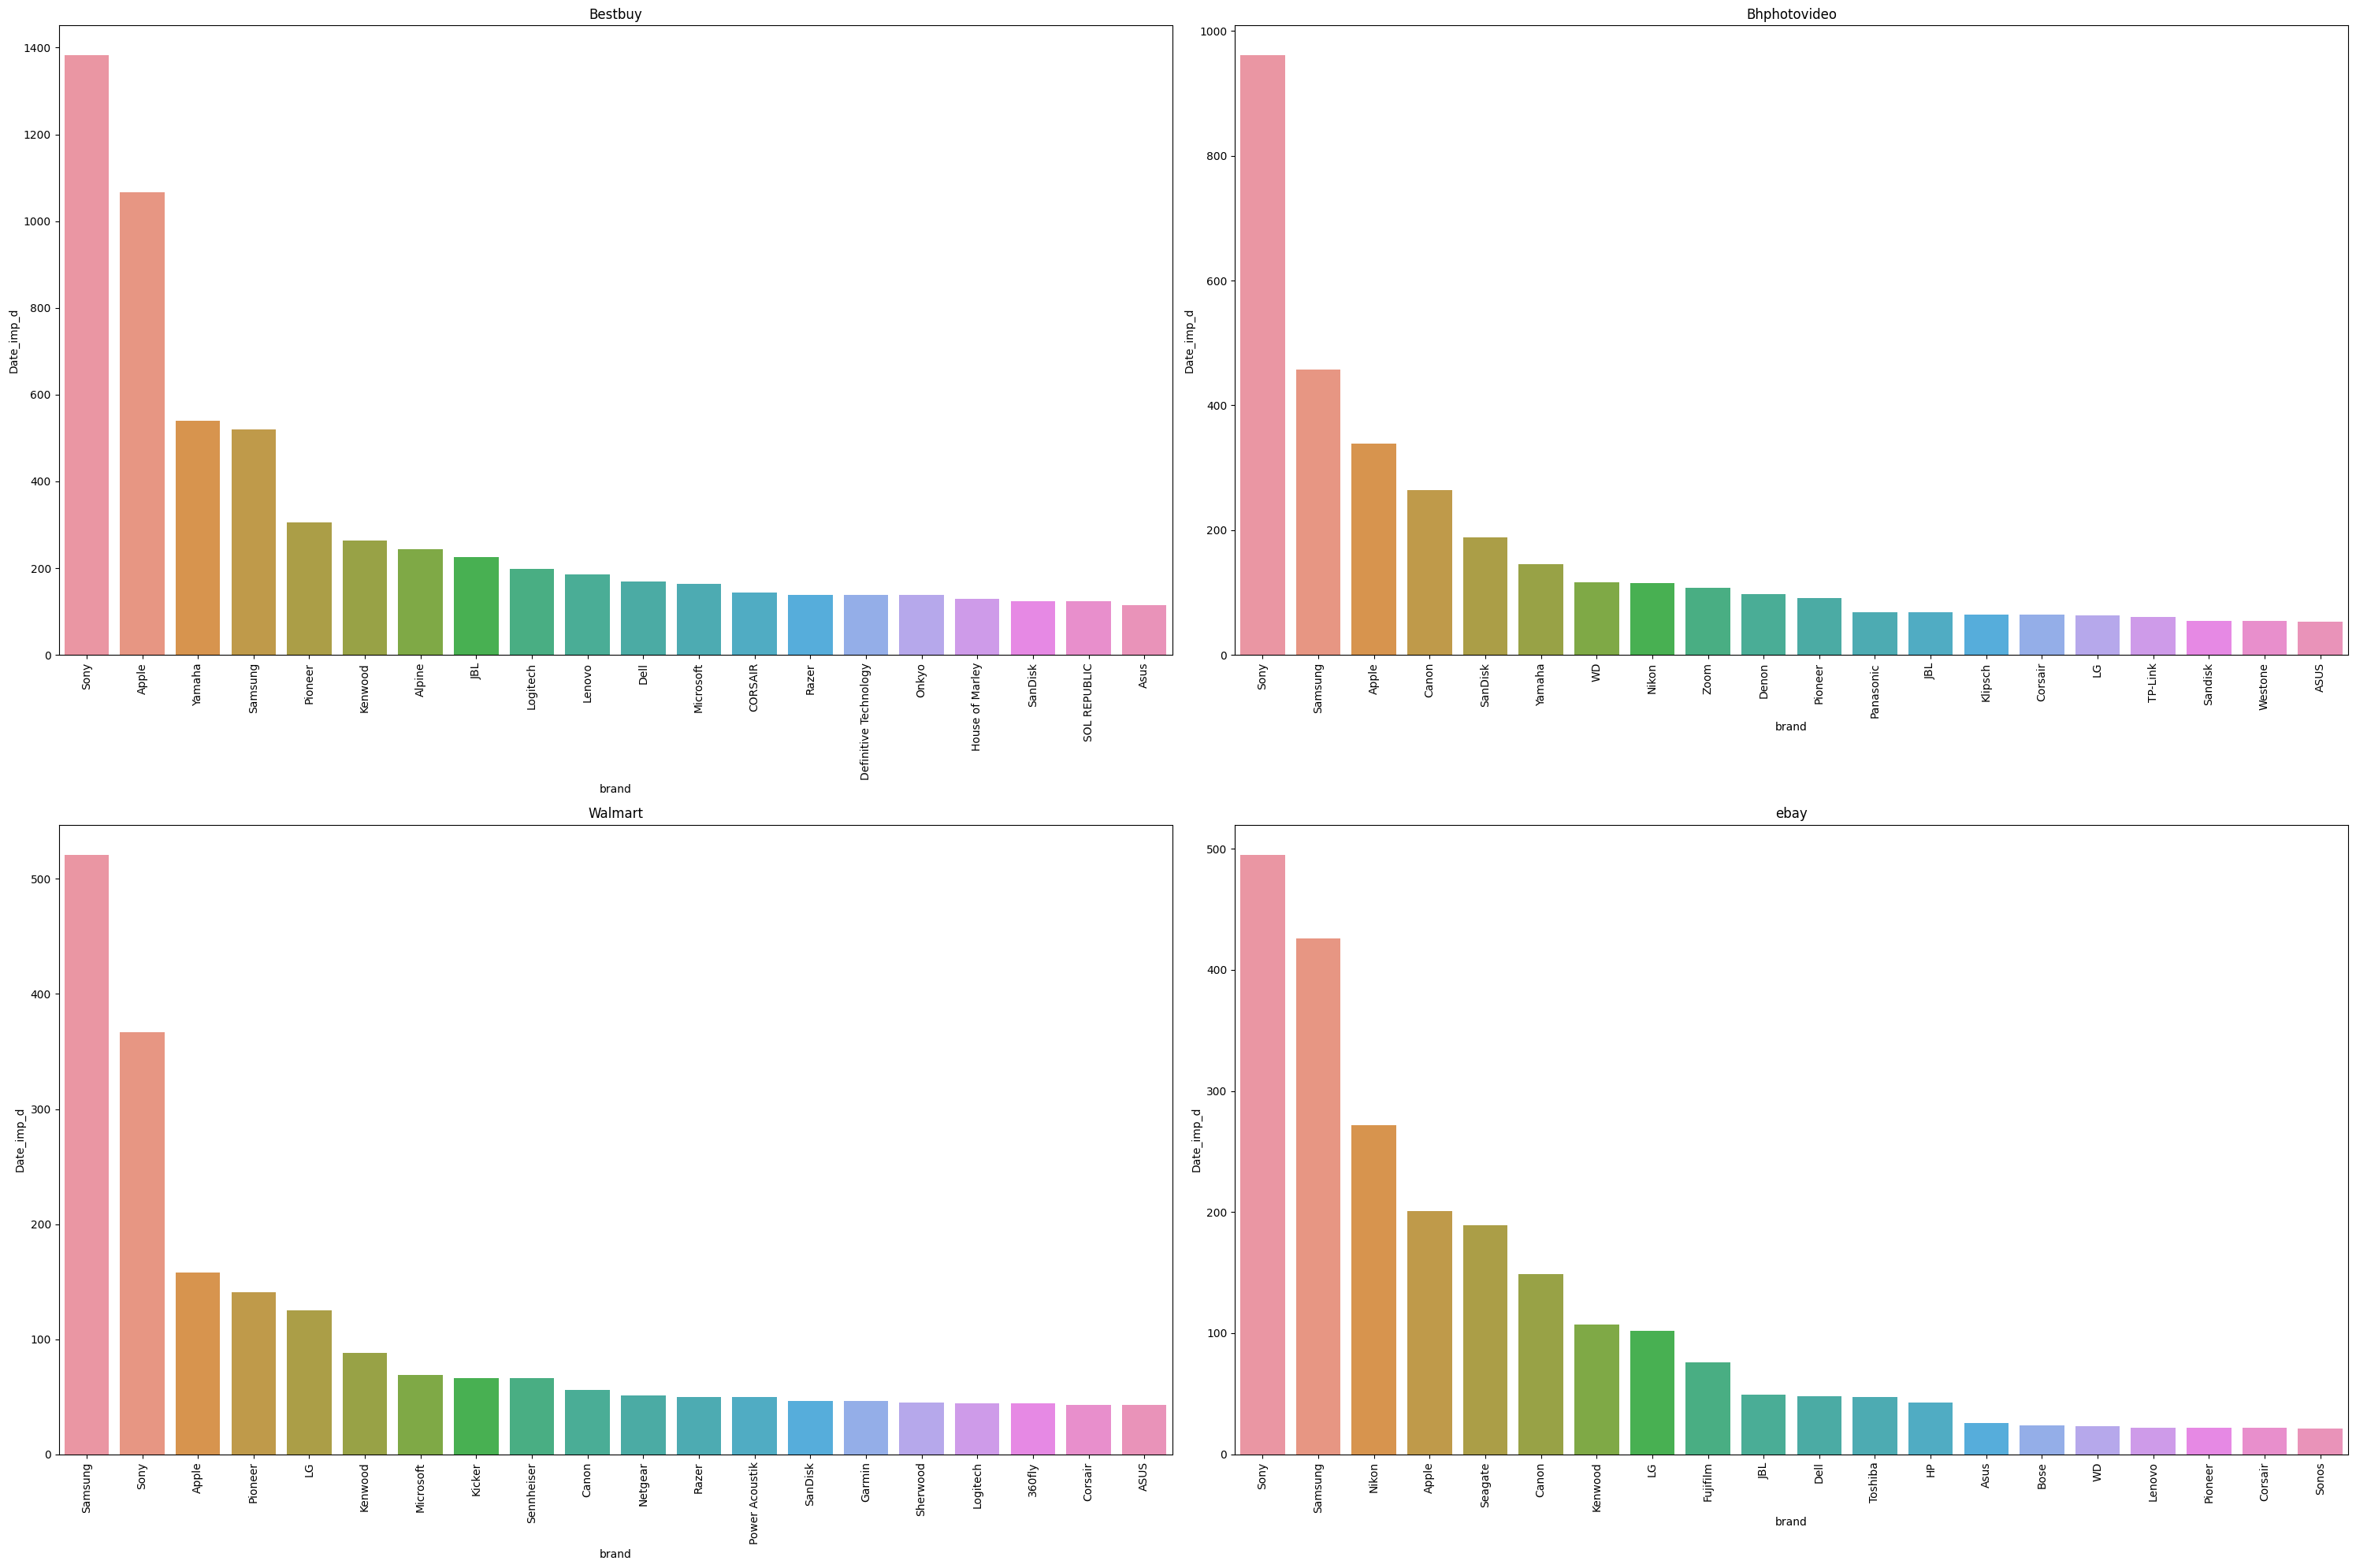

In [207]:
plt.figure(figsize=(30,20))

plt.subplot(2, 2, 1) #index is in which position the plot will be displayed
aux8 = df_best[['Date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('Bestbuy')
sns.barplot(x='brand', y='Date_imp_d', data=aux8.head(20))

plt.subplot(2, 2, 2) #index is in which position the plot will be displayed
aux9 = df_bhp[['Date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('Bhphotovideo')
sns.barplot(x='brand', y='Date_imp_d', data=aux9.head(20))

plt.subplot(2, 2, 3) #index is in which position the plot will be displayed
aux10 = df_wal[['Date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('Walmart')
sns.barplot(x='brand', y='Date_imp_d', data=aux10.head(20))

plt.subplot(2, 2, 4) #index is in which position the plot will be displayed
aux11 = df_ebay[['Date_imp_d', 'brand']].groupby('brand').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
plt.xticks(rotation = 90)
plt.title('ebay')
sns.barplot(x='brand', y='Date_imp_d', data=aux11.head(20))

plt.tight_layout()

#### 2.1.4 During which days, weeks, and months do the stores experience the highest sales?

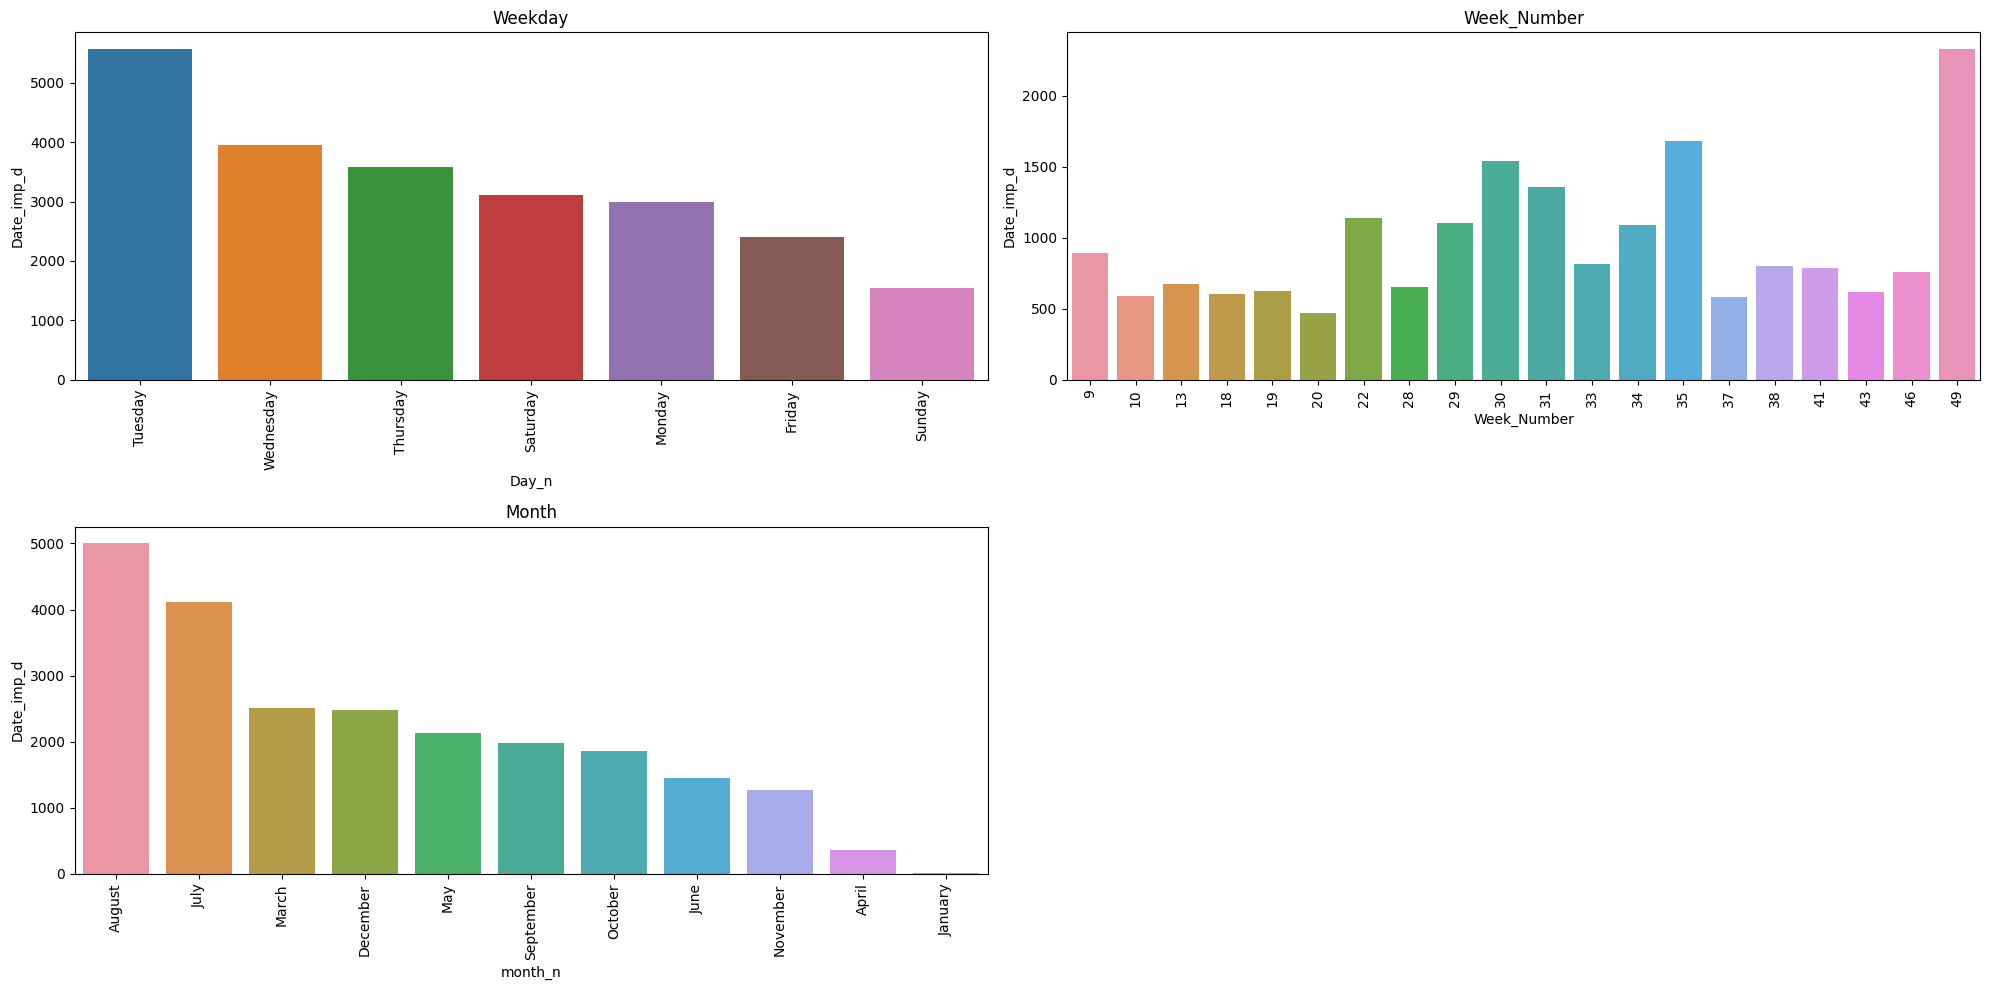

In [208]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1) #index is in which position the plot will be displayed
aux12 = df2[['Date_imp_d', 'Day_n']].groupby('Day_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux12
plt.xticks(rotation = 90)
plt.title('Weekday')
sns.barplot(x='Day_n', y='Date_imp_d', data=aux12.head(20));

plt.subplot(2, 2, 2) #index is in which position the plot will be displayed
aux13 = df2[['Date_imp_d', 'Week_Number']].groupby('Week_Number').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux13
plt.xticks(rotation = 90)
plt.title('Week_Number')
sns.barplot(x='Week_Number', y='Date_imp_d', data=aux13.head(20));

plt.subplot(2, 2, 3) #index is in which position the plot will be displayed
aux14 = df2[['Date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux14
plt.xticks(rotation = 90)
plt.title('Month')
sns.barplot(x='month_n', y='Date_imp_d', data=aux14.head(20));

plt.tight_layout()

##### b) per store

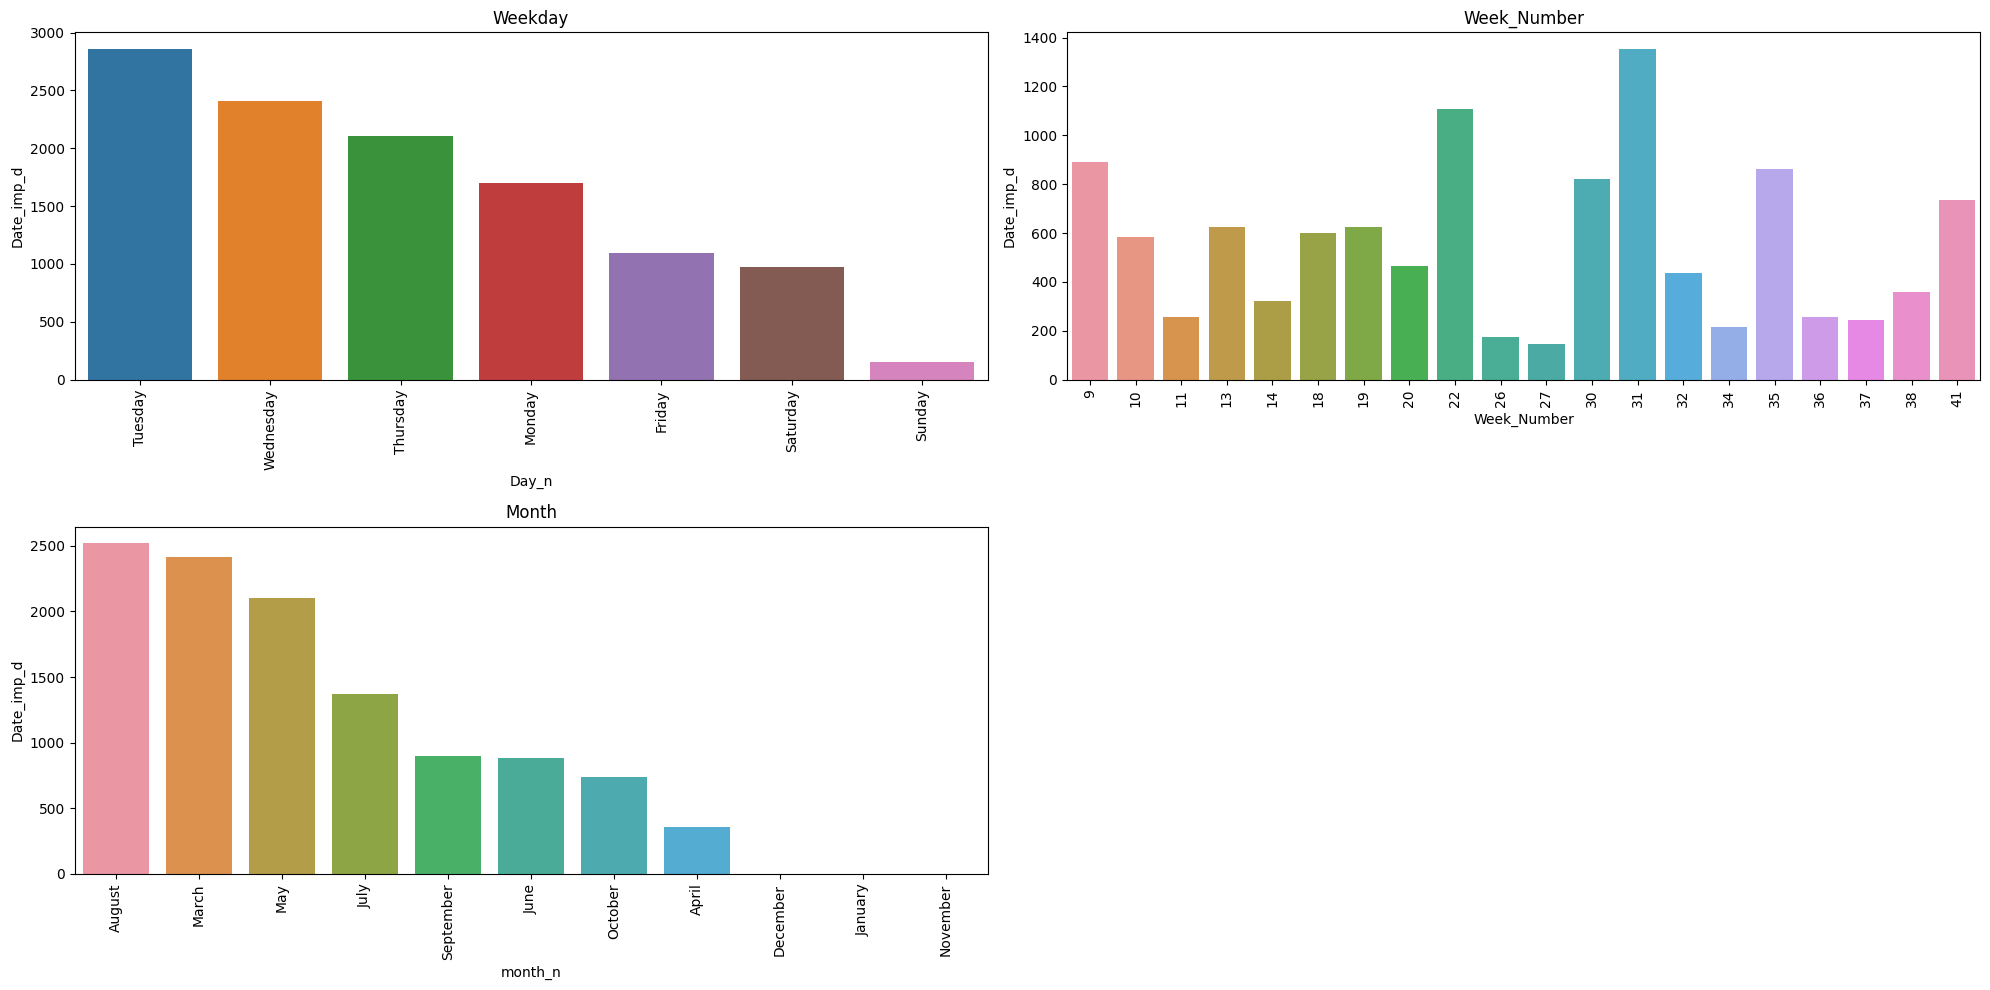

In [209]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1) #index is in which position the plot will be displayed
aux15 = df_best[['Date_imp_d', 'Day_n']].groupby('Day_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux15
plt.xticks(rotation = 90)
plt.title('Weekday')
sns.barplot(x='Day_n', y='Date_imp_d', data=aux15.head(20));

plt.subplot(2, 2, 2) #index is in which position the plot will be displayed
aux16 = df_best[['Date_imp_d', 'Week_Number']].groupby('Week_Number').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux16
plt.xticks(rotation = 90)
plt.title('Week_Number')
sns.barplot(x='Week_Number', y='Date_imp_d', data=aux16.head(20));

plt.subplot(2, 2, 3) #index is in which position the plot will be displayed
aux17 = df_best[['Date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux17
plt.xticks(rotation = 90)
plt.title('Month')
sns.barplot(x='month_n', y='Date_imp_d', data=aux17.head(20));

plt.tight_layout()

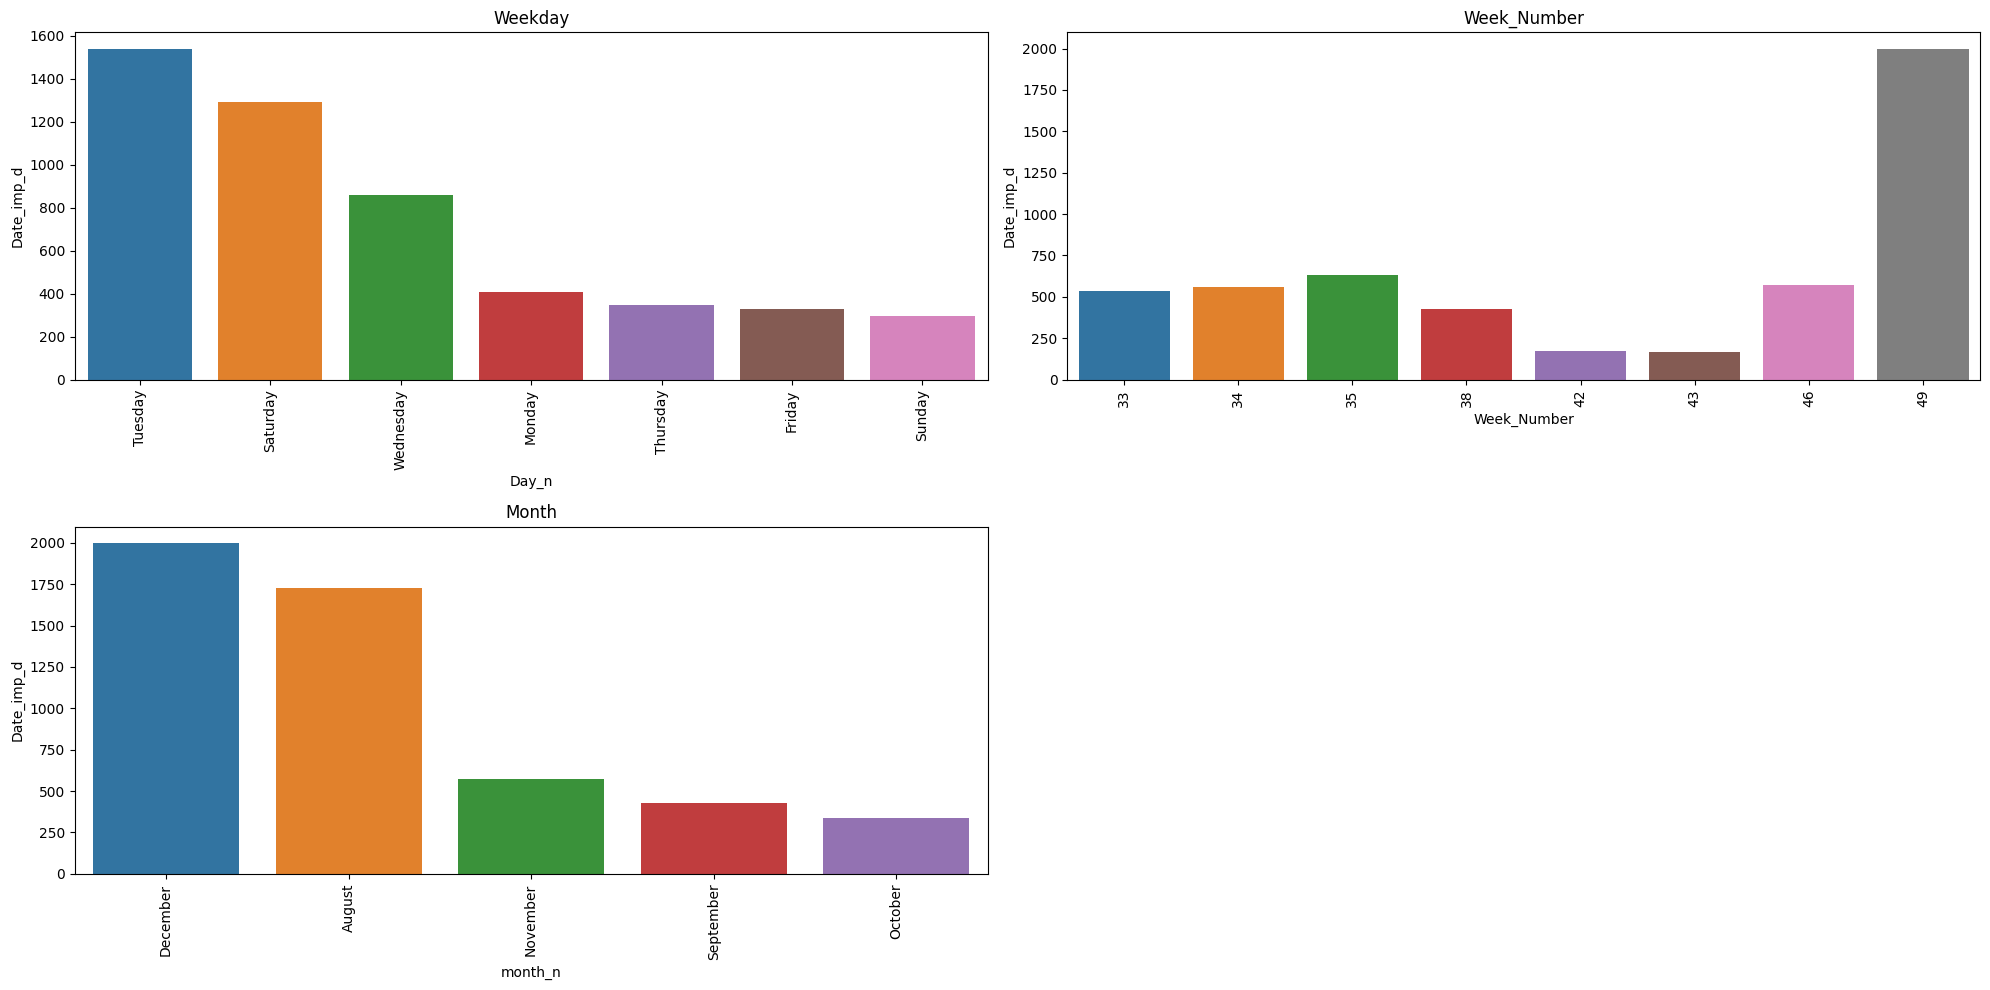

In [210]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1) #index is in which position the plot will be displayed
aux18 = df_bhp[['Date_imp_d', 'Day_n']].groupby('Day_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux18
plt.xticks(rotation = 90)
plt.title('Weekday')
sns.barplot(x='Day_n', y='Date_imp_d', data=aux18.head(20));

plt.subplot(2, 2, 2) #index is in which position the plot will be displayed
aux19 = df_bhp[['Date_imp_d', 'Week_Number']].groupby('Week_Number').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux19
plt.xticks(rotation = 90)
plt.title('Week_Number')
sns.barplot(x='Week_Number', y='Date_imp_d', data=aux19.head(20));

plt.subplot(2, 2, 3) #index is in which position the plot will be displayed
aux20 = df_bhp[['Date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux20
plt.xticks(rotation = 90)
plt.title('Month')
sns.barplot(x='month_n', y='Date_imp_d', data=aux20.head(20));

plt.tight_layout()

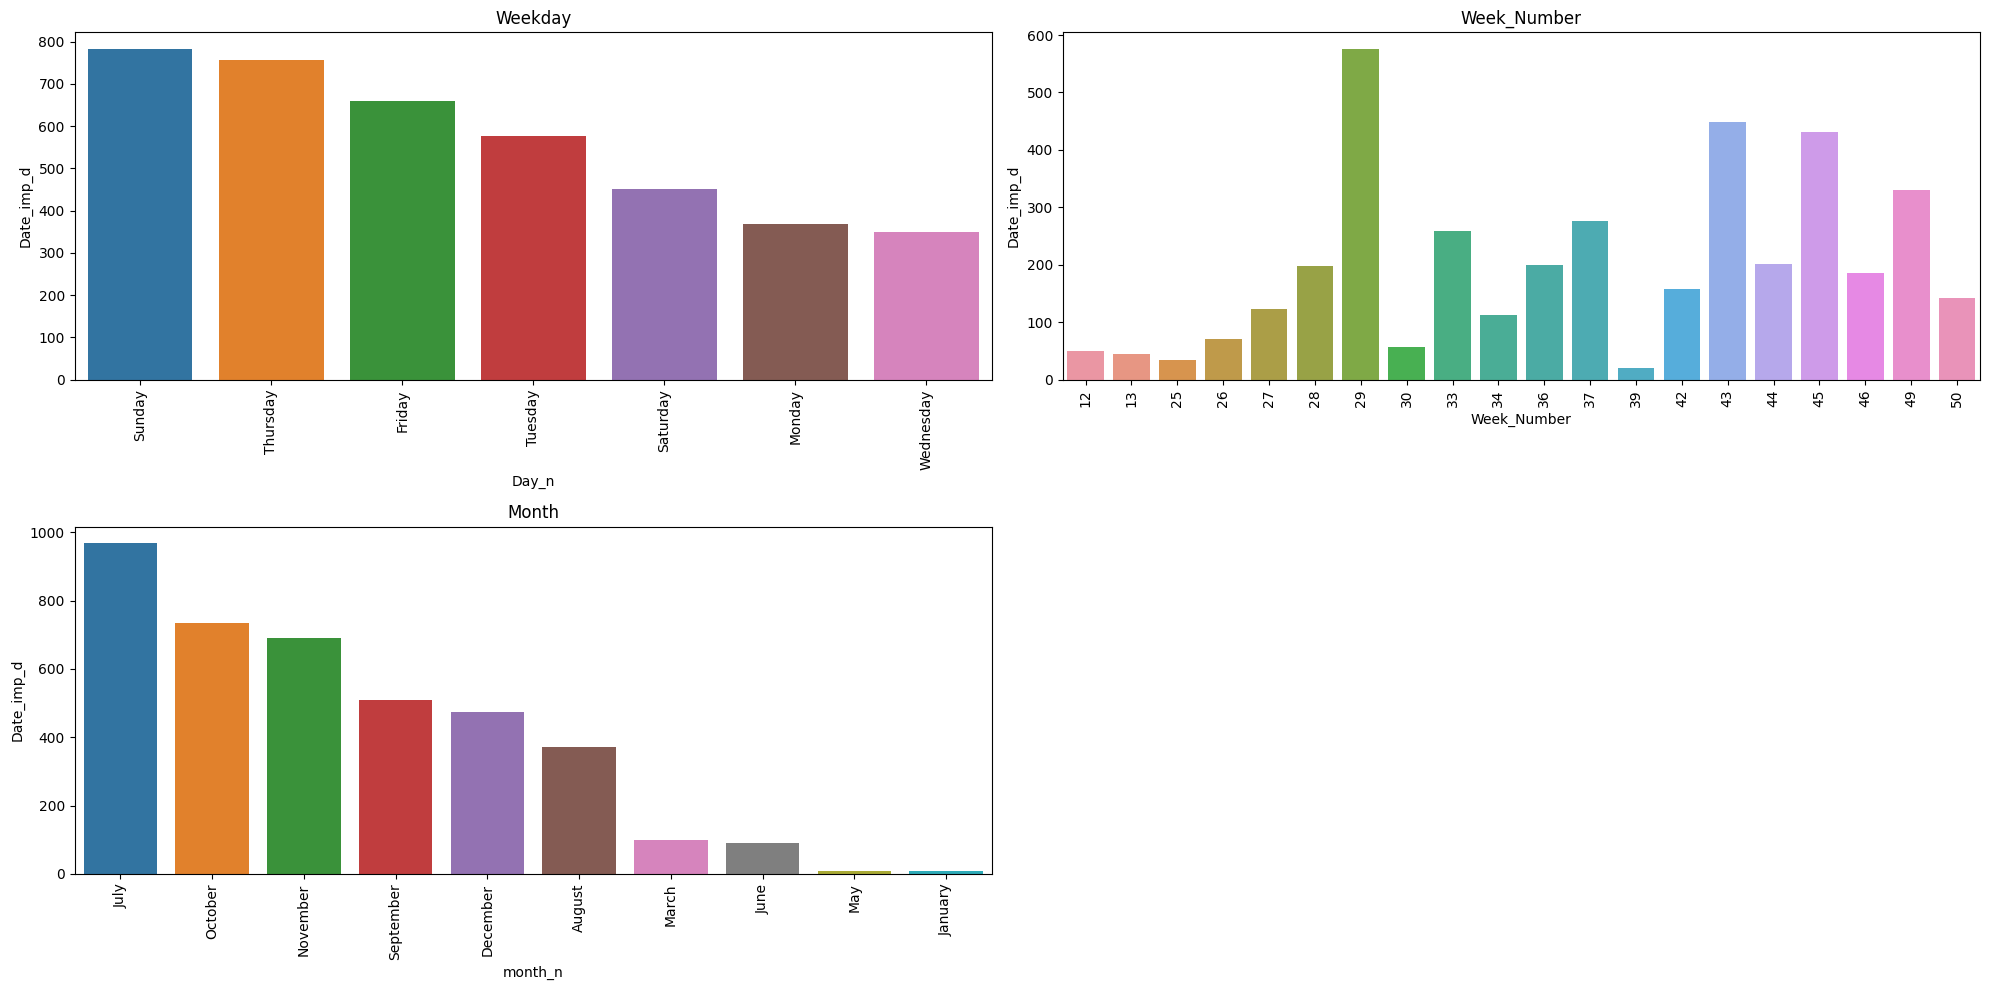

In [211]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1) #index is in which position the plot will be displayed
aux21 = df_wal[['Date_imp_d', 'Day_n']].groupby('Day_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux21
plt.xticks(rotation = 90)
plt.title('Weekday')
sns.barplot(x='Day_n', y='Date_imp_d', data=aux21.head(20));

plt.subplot(2, 2, 2) #index is in which position the plot will be displayed
aux22 = df_wal[['Date_imp_d', 'Week_Number']].groupby('Week_Number').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux22
plt.xticks(rotation = 90)
plt.title('Week_Number')
sns.barplot(x='Week_Number', y='Date_imp_d', data=aux22.head(20));

plt.subplot(2, 2, 3) #index is in which position the plot will be displayed
aux23 = df_wal[['Date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux23
plt.xticks(rotation = 90)
plt.title('Month')
sns.barplot(x='month_n', y='Date_imp_d', data=aux23.head(20));

plt.tight_layout()

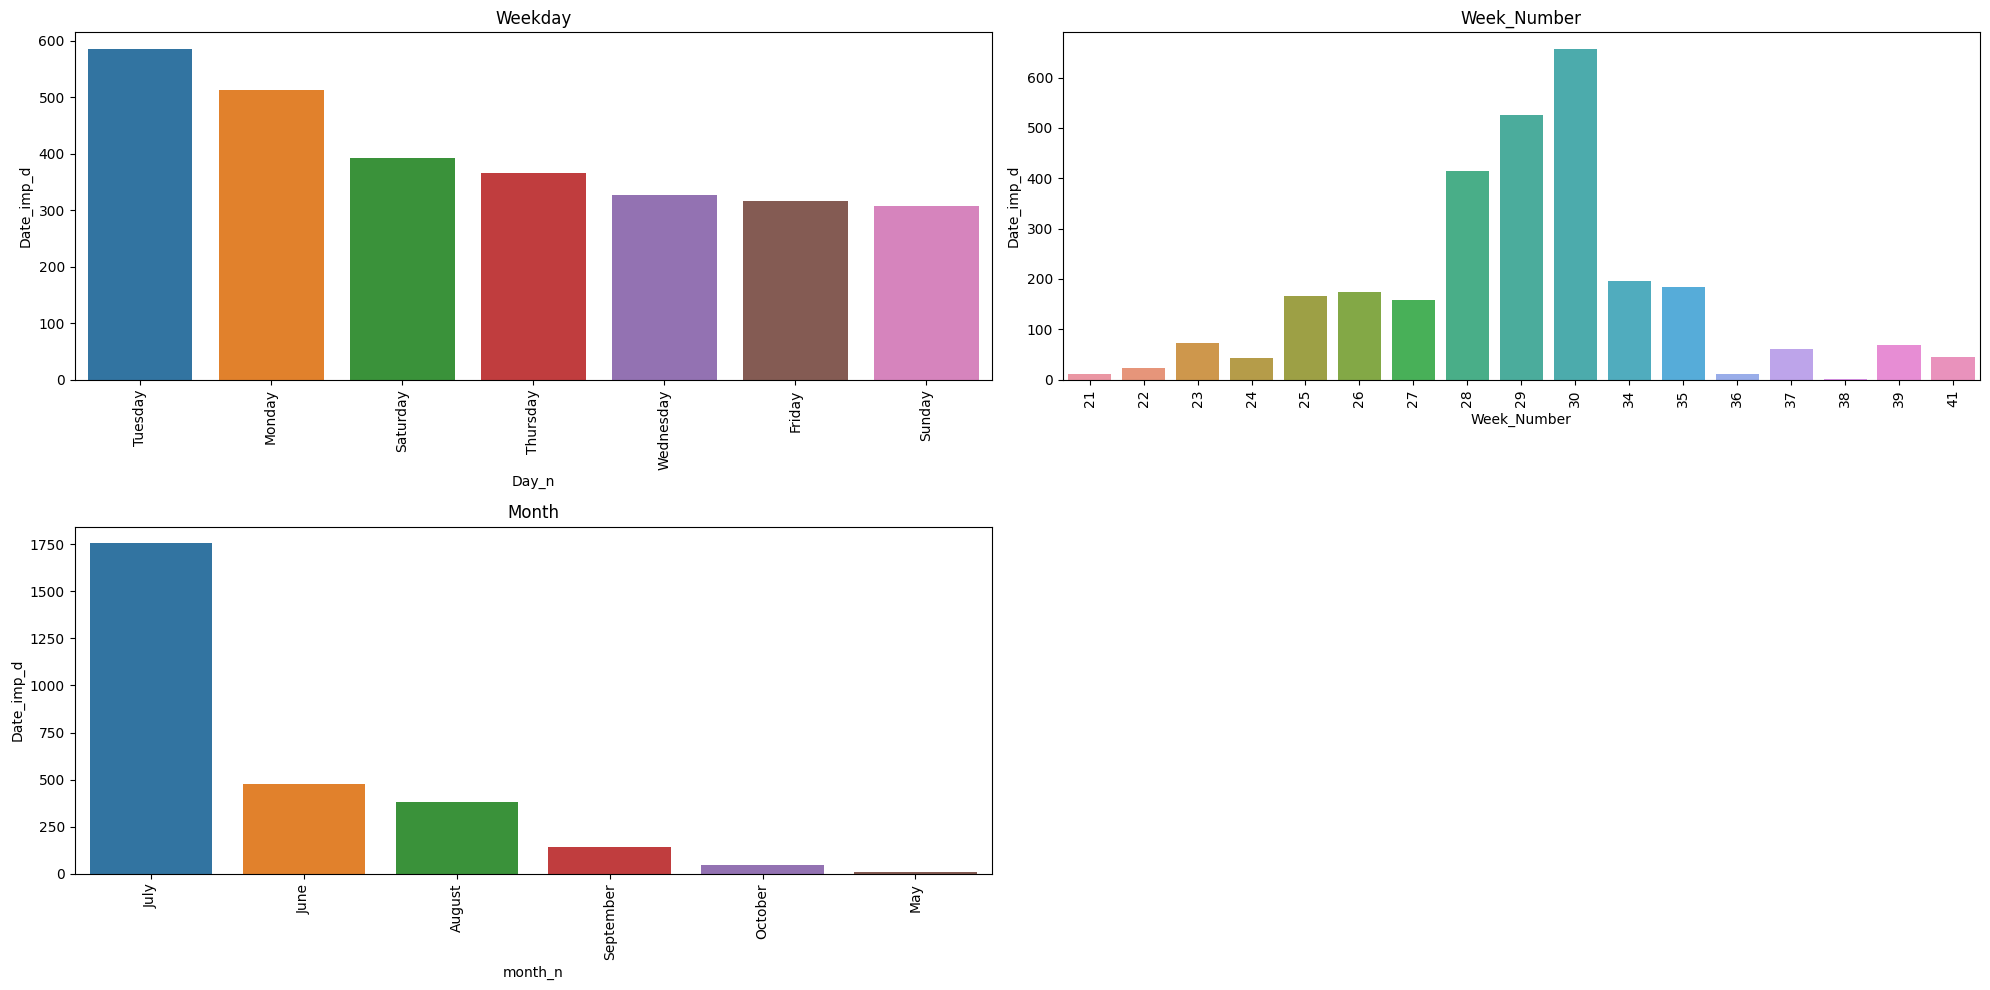

In [212]:
plt.figure(figsize=(20,10))

plt.subplot(2, 2, 1) #index is in which position the plot will be displayed
aux24 = df_ebay[['Date_imp_d', 'Day_n']].groupby('Day_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux24
plt.xticks(rotation = 90)
plt.title('Weekday')
sns.barplot(x='Day_n', y='Date_imp_d', data=aux24.head(20));

plt.subplot(2, 2, 2) #index is in which position the plot will be displayed
aux25 = df_ebay[['Date_imp_d', 'Week_Number']].groupby('Week_Number').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux25
plt.xticks(rotation = 90)
plt.title('Week_Number')
sns.barplot(x='Week_Number', y='Date_imp_d', data=aux25.head(20));

plt.subplot(2, 2, 3) #index is in which position the plot will be displayed
aux26 = df_ebay[['Date_imp_d', 'month_n']].groupby('month_n').count().reset_index().sort_values(by='Date_imp_d', ascending=False)
aux26
plt.xticks(rotation = 90)
plt.title('Month')
sns.barplot(x='month_n', y='Date_imp_d', data=aux26.head(20));

plt.tight_layout()

## 3.0 Feature Engineering

### 3.1 Select dataset

In [213]:
### select category 'camera,mirrorless, photo' from bhphotovideo e-commerce
df3 = df_bhp[df_bhp['Category_name'] == 'camera, mirrorless, photo']

In [214]:
### check NA
df3.isna().sum()

Date_imp_d         0
Category_name      0
name               0
price              0
merchant           0
brand              0
manufacturer     184
Day_n              0
month              0
month_n            0
day                0
Week_Number        0
dtype: int64

### 3.2 Select the columns necessary to calculate the price elasticity

In [215]:
test = df3.groupby(['name', 'Week_Number']).agg({'price': 'mean', 'Date_imp_d': 'count'}).reset_index()
test.head()

,name,Week_Number,price,Date_imp_d
0,Alpha a5100 Mirrorless Digital Camera with 16-...,33,548.0000,1
1,Alpha a5100 Mirrorless Digital Camera with 16-...,35,701.9875,4
2,Alpha a5100 Mirrorless Digital Camera with 16-...,42,573.0000,2
3,Alpha a5100 Mirrorless Digital Camera with 16-...,43,674.5000,2
4,Alpha a5100 Mirrorless Digital Camera with 16-...,46,672.8750,8


### 3.3 Create the x and y dataset necessary to calculate the price elasticity

In [216]:
###create dataframe for price
x_price = test.pivot(index= 'Week_Number', columns= 'name', values='price')
x_price = pd.DataFrame(x_price.to_records())
x_price.head()

,Week_Number,Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included,"D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)",D750 DSLR Camera Body with Adobe Creative Cloud 12-Month Subscription Kit,EOS Rebel SL2 DSLR Camera Body Deluxe Kit,Gear 360 Spherical VR Camera,Lumix DMC-G7 Mirrorless Micro Four Thirds Digital Camera with 14-42mm Lens and Accessory Kit (Black),Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black,Tiffen - 72mm Neutral-Density 0.9 Lens Filter,instax mini 8 Instant Film Camera and Groovy Case Kit (Raspberry),instax mini Rainbow Instant Film (10 Exposures)
0,33,548.0000,548.0000,1046.000000,1548.00,1148.0,2648.000000,899.0000,746.950000,1979.950,549.0,498.975,697.99,997.99,34.97,59.980,27.925000
1,34,NaN,548.0000,NaN,2022.00,1148.0,3047.333333,1075.4875,499.000000,2092.880,549.0,229.000,797.99,997.99,34.97,62.465,27.740000
2,35,701.9875,751.4875,841.316667,1890.75,1248.0,3967.500000,1094.0880,746.950000,1985.780,549.0,498.975,818.98,997.99,34.92,62.465,29.153333
3,38,NaN,NaN,NaN,1689.00,NaN,3517.200000,1249.5000,746.950000,2070.715,549.0,229.000,797.99,997.99,NaN,62.465,24.616667
4,42,573.0000,NaN,NaN,1997.50,NaN,4010.500000,NaN,657.633333,NaN,NaN,NaN,939.97,NaN,32.99,69.950,39.450000


In [217]:
### create dataframe for the demand
y_demand = test.pivot(index='Week_Number', columns='name', values='Date_imp_d')
y_demand = pd.DataFrame(y_demand.to_records())
y_demand.head()

,Week_Number,Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included,"D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)",D750 DSLR Camera Body with Adobe Creative Cloud 12-Month Subscription Kit,EOS Rebel SL2 DSLR Camera Body Deluxe Kit,Gear 360 Spherical VR Camera,Lumix DMC-G7 Mirrorless Micro Four Thirds Digital Camera with 14-42mm Lens and Accessory Kit (Black),Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black,Tiffen - 72mm Neutral-Density 0.9 Lens Filter,instax mini 8 Instant Film Camera and Groovy Case Kit (Raspberry),instax mini Rainbow Instant Film (10 Exposures)
0,33,1.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,4.0,2.0,1.0,1.0,1.0,4.0
1,34,NaN,1.0,NaN,4.0,2.0,6.0,8.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0
2,35,4.0,4.0,3.0,8.0,4.0,22.0,10.0,2.0,8.0,1.0,4.0,4.0,1.0,1.0,2.0,3.0
3,38,NaN,NaN,NaN,6.0,NaN,10.0,2.0,4.0,8.0,1.0,4.0,1.0,1.0,NaN,2.0,3.0
4,42,2.0,NaN,NaN,3.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN,2.0,NaN,1.0,1.0,2.0


## 4.0 Data description of the new datasets

### 4.1 Data dimension

In [218]:
print(f'Number of rows: {x_price.shape[0]}')
print(f'Number of columns: {x_price.shape[1]}')

Number of rows: 8
Number of columns: 17


In [219]:
print(f'Number of rows: {y_demand.shape[0]}')
print(f'Number of columns: {y_demand.shape[1]}')

Number of rows: 8
Number of columns: 17


### 4.2 Data types

In [220]:
x_price.dtypes

Week_Number                                                                                               int64
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White)                                         float64
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black)                              float64
Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver)                     float64
Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit                                           float64
Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit                                    float64
Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit                                        float64
Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included              float64
D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)                                   

In [221]:
y_demand.dtypes

Week_Number                                                                                               int64
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White)                                         float64
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black)                              float64
Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver)                     float64
Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit                                           float64
Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit                                    float64
Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit                                        float64
Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included              float64
D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)                                   

### 4.3 Check NA

In [222]:
x_price.isna().sum()

Week_Number                                                                                             0
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White)                                         2
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black)                              2
Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver)                     4
Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit                                           0
Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit                                    2
Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit                                        1
Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included              1
D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)                                   0
D750 DSLR Camera Body with Adobe Creative Clou

In [223]:
y_demand.isna().sum()

Week_Number                                                                                             0
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White)                                         2
Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black)                              2
Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver)                     4
Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit                                           0
Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit                                    2
Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit                                        1
Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included              1
D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)                                   0
D750 DSLR Camera Body with Adobe Creative Clou

### 4.4 Replace NA

In [224]:
a = np.round(x_price.median(), 2)
x_price.fillna(a, inplace=True)
x_price.head()

,Week_Number,Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included,"D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)",D750 DSLR Camera Body with Adobe Creative Cloud 12-Month Subscription Kit,EOS Rebel SL2 DSLR Camera Body Deluxe Kit,Gear 360 Spherical VR Camera,Lumix DMC-G7 Mirrorless Micro Four Thirds Digital Camera with 14-42mm Lens and Accessory Kit (Black),Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black,Tiffen - 72mm Neutral-Density 0.9 Lens Filter,instax mini 8 Instant Film Camera and Groovy Case Kit (Raspberry),instax mini Rainbow Instant Film (10 Exposures)
0,33,548.0000,548.0000,1046.000000,1548.00,1148.0,2648.000000,899.0000,746.950000,1979.950,549.0,498.975,697.99,997.99,34.97,59.980,27.925000
1,34,633.0600,548.0000,788.400000,2022.00,1148.0,3047.333333,1075.4875,499.000000,2092.880,549.0,229.000,797.99,997.99,34.97,62.465,27.740000
2,35,701.9875,751.4875,841.316667,1890.75,1248.0,3967.500000,1094.0880,746.950000,1985.780,549.0,498.975,818.98,997.99,34.92,62.465,29.153333
3,38,633.0600,638.3900,788.400000,1689.00,1173.0,3517.200000,1249.5000,746.950000,2070.715,549.0,229.000,797.99,997.99,32.99,62.465,24.616667
4,42,573.0000,638.3900,788.400000,1997.50,1173.0,4010.500000,1094.0900,657.633333,2037.350,549.0,289.000,939.97,997.99,32.99,69.950,39.450000


In [225]:
y_demand.fillna(0, inplace=True)
y_demand.head()

,Week_Number,Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White),Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black),Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver),Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit,Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit,Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit,Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included,"D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)",D750 DSLR Camera Body with Adobe Creative Cloud 12-Month Subscription Kit,EOS Rebel SL2 DSLR Camera Body Deluxe Kit,Gear 360 Spherical VR Camera,Lumix DMC-G7 Mirrorless Micro Four Thirds Digital Camera with 14-42mm Lens and Accessory Kit (Black),Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black,Tiffen - 72mm Neutral-Density 0.9 Lens Filter,instax mini 8 Instant Film Camera and Groovy Case Kit (Raspberry),instax mini Rainbow Instant Film (10 Exposures)
0,33,1.0,1.0,1.0,2.0,2.0,4.0,2.0,2.0,6.0,1.0,4.0,2.0,1.0,1.0,1.0,4.0
1,34,0.0,1.0,0.0,4.0,2.0,6.0,8.0,1.0,6.0,1.0,2.0,1.0,1.0,1.0,2.0,4.0
2,35,4.0,4.0,3.0,8.0,4.0,22.0,10.0,2.0,8.0,1.0,4.0,4.0,1.0,1.0,2.0,3.0
3,38,0.0,0.0,0.0,6.0,0.0,10.0,2.0,4.0,8.0,1.0,4.0,1.0,1.0,0.0,2.0,3.0
4,42,2.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,1.0,1.0,2.0


### 4.5 Descriptive statistics

In [226]:
###central tendency
ct1_x = pd.DataFrame(x_price.apply(np.mean)).T
ct2_x = pd.DataFrame(x_price.apply(np.median)).T

###dispersion
d1_x = pd.DataFrame(x_price.apply(np.std)).T
d2_x = pd.DataFrame(x_price.apply(min)).T
d3_x = pd.DataFrame(x_price.apply(max)).T
d4_x = pd.DataFrame(x_price.apply (lambda x: x.max() - x.min())).T
d5_x = pd.DataFrame(x_price.apply(lambda x: x.skew())).T
d6_x = pd.DataFrame(x_price.apply(lambda x: x.kurtosis())).T

m_x = pd.concat([d2_x, d3_x, d4_x, ct1_x, ct2_x, d1_x, d5_x, d6_x]).T.reset_index()
m_x.columns = ['att','min', 'max','range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m_x

,att,min,max,range,mean,median,std,skew,kurtosis
0,Week_Number,33.000000,49.000000,16.000000,40.000000,40.000000,5.522681,0.266560,-1.431416
1,Alpha a5100 Mirrorless Digital Camera with 16-...,548.000000,701.987500,153.987500,628.715000,633.060000,50.411698,-0.204204,-1.214066
2,Alpha a5100 Mirrorless Digital Camera with 16-...,548.000000,751.487500,203.487500,640.484926,638.390000,69.673599,0.150999,-1.027998
3,Alpha a6000 Mirrorless Digital Camera with 16-...,691.928571,1046.000000,354.071429,808.541592,788.400000,98.754071,1.848050,4.469248
4,Alpha a7 II Mirrorless Digital Camera Body wit...,1548.000000,2147.250000,599.250000,1884.164062,1944.125000,189.543471,-0.517064,-0.799641
5,Alpha a7 Mirrorless Digital Camera with 28-70m...,1098.000000,1298.000000,200.000000,1185.500000,1173.000000,58.630197,0.688943,0.389050
6,Alpha a7S II Mirrorless Digital Camera Body wi...,2648.000000,4010.500000,1362.500000,3554.384232,3734.831667,443.348281,-1.229372,0.657183
7,Canon Black EOS Rebel T5i Digital SLR Camera w...,899.000000,1249.500000,350.500000,1082.067847,1094.089000,96.743258,-0.354741,1.078453
8,D3400 DSLR Camera with 18-55mm and 70-300mm Le...,499.000000,746.950000,247.950000,675.701190,702.291667,84.696961,-1.143893,0.738162
9,D750 DSLR Camera Body with Adobe Creative Clou...,1979.950000,2092.880000,112.930000,2034.841354,2037.350000,37.734343,-0.092933,-1.176769


In [227]:
###central tendency
ct1_y = pd.DataFrame(y_demand.apply(np.mean)).T
ct2_y = pd.DataFrame(y_demand.apply(np.median)).T

###dispersion
d1_y = pd.DataFrame(y_demand.apply(np.std)).T
d2_y = pd.DataFrame(y_demand.apply(min)).T
d3_y = pd.DataFrame(y_demand.apply(max)).T
d4_y = pd.DataFrame(y_demand.apply (lambda x: x.max() - x.min())).T
d5_y = pd.DataFrame(y_demand.apply(lambda x: x.skew())).T
d6_y = pd.DataFrame(y_demand.apply(lambda x: x.kurtosis())).T

m_y = pd.concat([d2_y, d3_y, d4_y, ct1_y, ct2_y, d1_y, d5_y, d6_y]).T.reset_index()
m_y.columns = ['att','min', 'max','range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m_y

,att,min,max,range,mean,median,std,skew,kurtosis
0,Week_Number,33.0,49.0,16.0,40.000,40.0,5.522681,0.266560,-1.431416
1,Alpha a5100 Mirrorless Digital Camera with 16-...,0.0,16.0,16.0,4.125,2.0,5.109733,1.802716,3.119440
2,Alpha a5100 Mirrorless Digital Camera with 16-...,0.0,14.0,14.0,3.500,1.5,4.415880,1.906467,3.782692
3,Alpha a6000 Mirrorless Digital Camera with 16-...,0.0,14.0,14.0,3.250,0.5,4.815340,1.676581,2.099049
4,Alpha a7 II Mirrorless Digital Camera Body wit...,2.0,32.0,30.0,7.875,5.0,9.333240,2.578839,6.929032
5,Alpha a7 Mirrorless Digital Camera with 28-70m...,0.0,4.0,4.0,1.875,2.0,1.452369,0.271937,-1.001086
6,Alpha a7S II Mirrorless Digital Camera Body wi...,0.0,57.0,57.0,13.250,6.0,17.739433,2.196722,5.002697
7,Canon Black EOS Rebel T5i Digital SLR Camera w...,0.0,22.0,22.0,7.250,5.0,6.923691,1.184753,1.147531
8,D3400 DSLR Camera with 18-55mm and 70-300mm Le...,1.0,7.0,6.0,3.000,2.5,1.732051,1.620185,3.150000
9,D750 DSLR Camera Body with Adobe Creative Clou...,0.0,24.0,24.0,7.500,7.0,6.982120,1.668133,3.986935


## 5.0 EDA

<Axes: xlabel='products', ylabel='demand'>

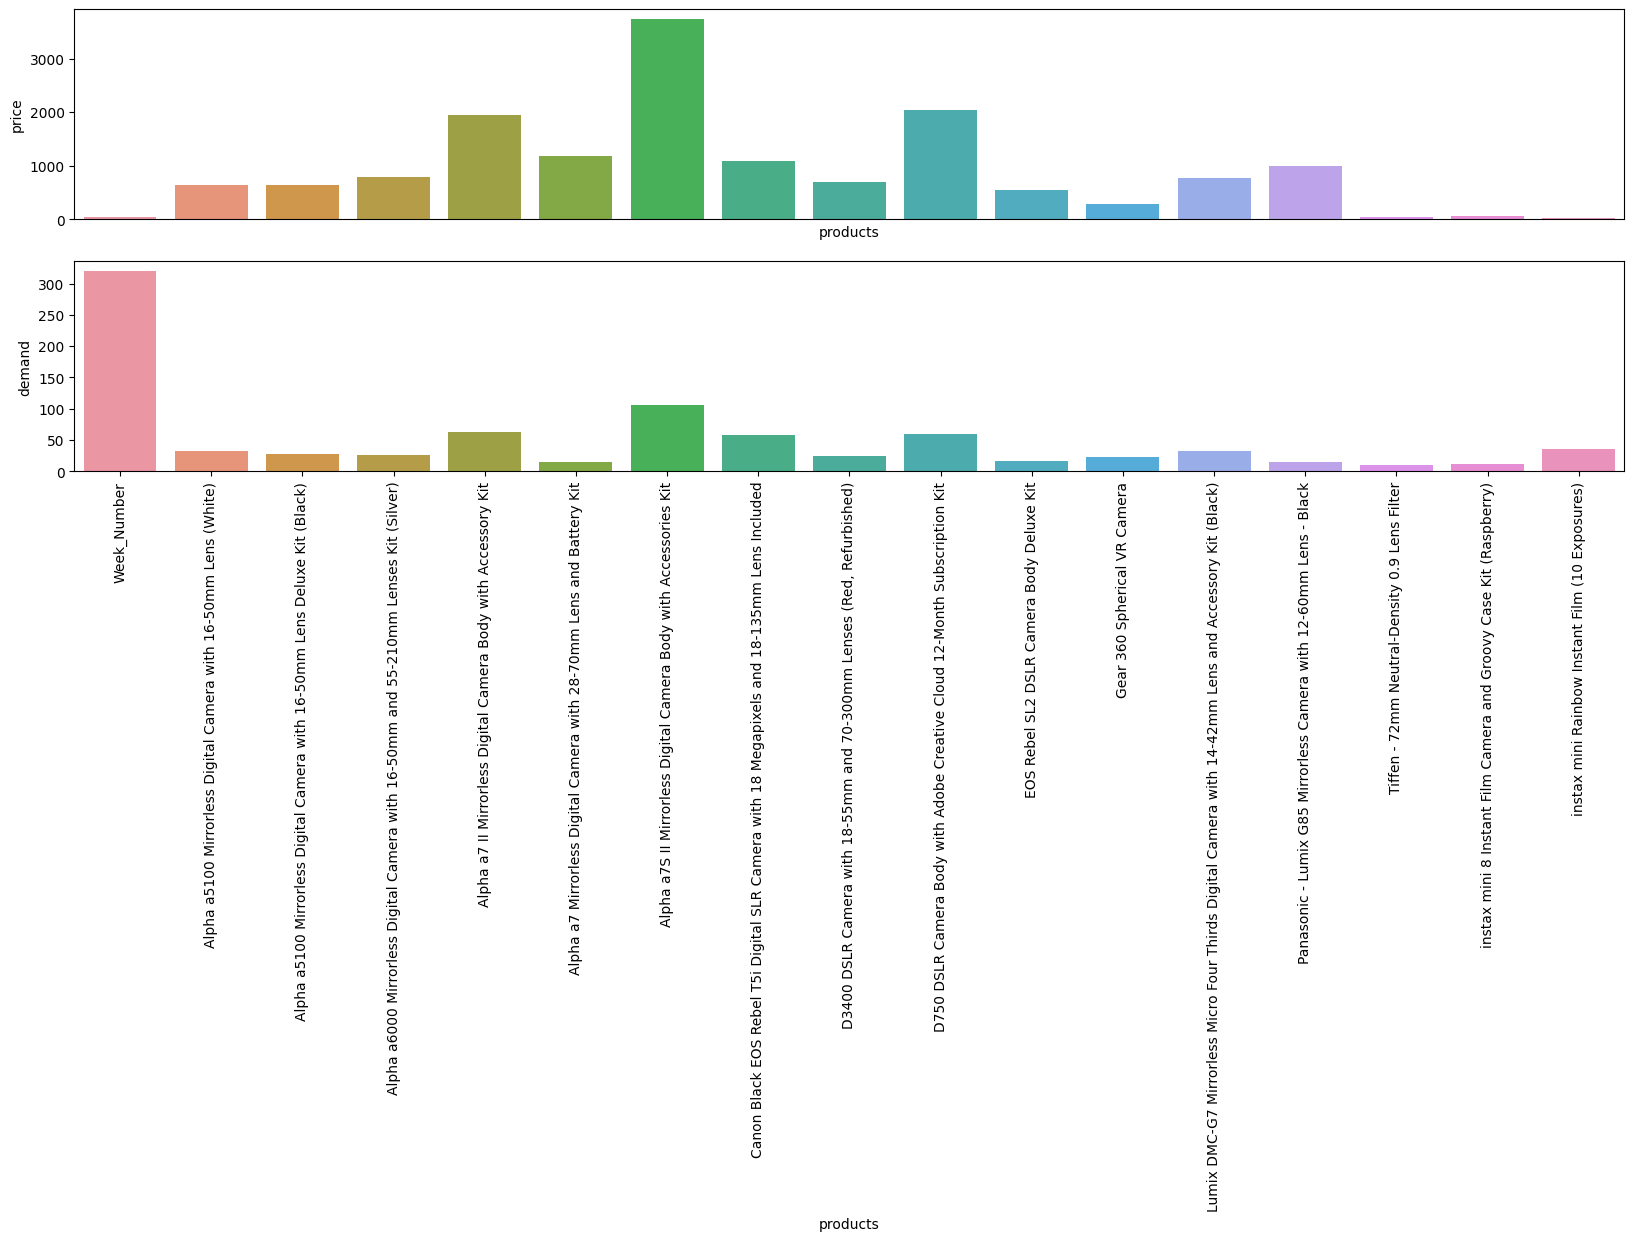

In [228]:
plt.figure(figsize=(20,6))

plt.subplot(2,1,1)
aux1 = pd.DataFrame(x_price.apply(lambda x: x.median())).reset_index()
aux1.columns = ['products','price']
sns.barplot(x='products', y='price', data=aux1)
plt.xticks([])

plt.subplot(2,1,2)
aux2 = pd.DataFrame(y_demand.apply(lambda x: x.sum())).reset_index()
aux2.columns = ['products','demand']
plt.xticks(rotation = 90)
sns.barplot(x='products', y='demand', data=aux2)

C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\3841909058.py:25: UserWarning: The figure layout

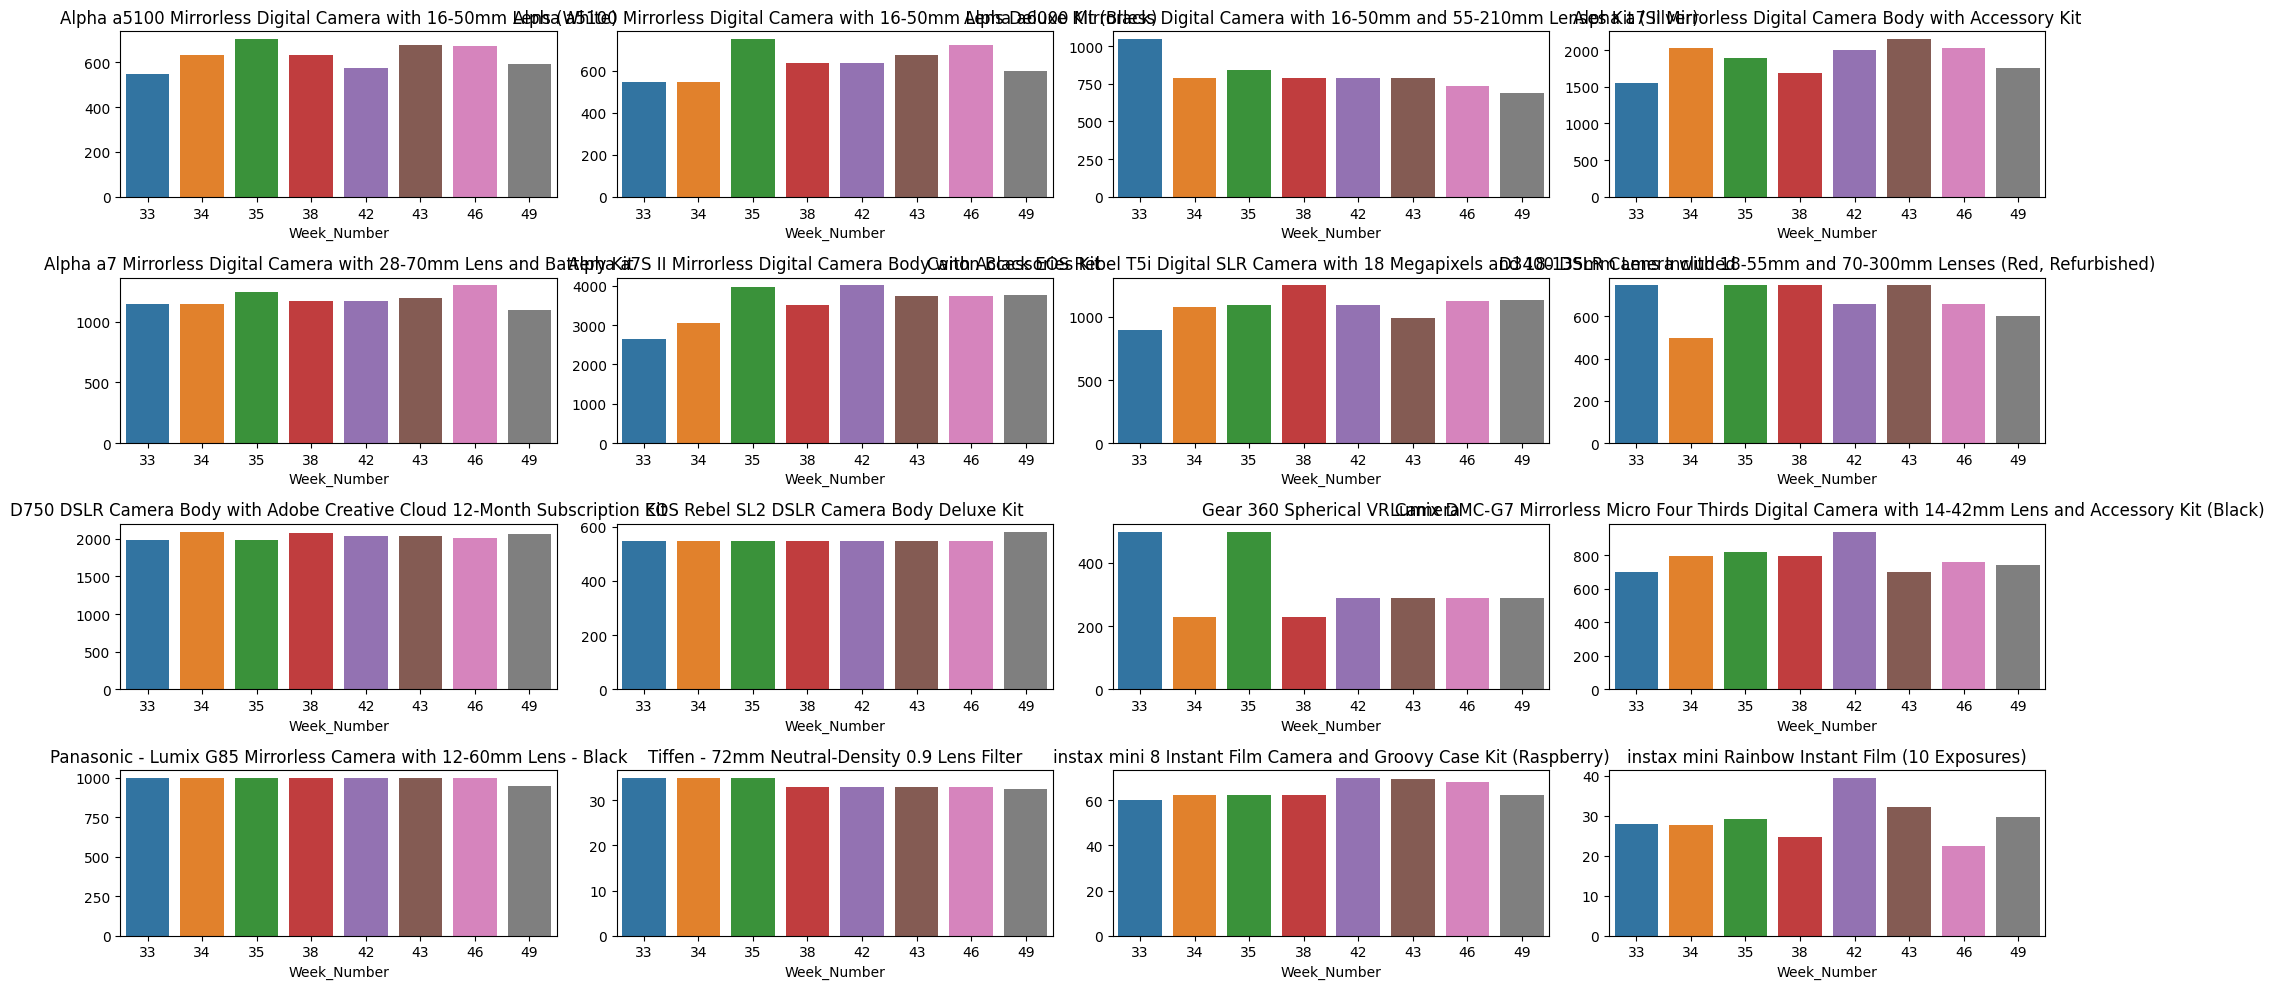

In [229]:
a = ['Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens (White)',
    'Alpha a5100 Mirrorless Digital Camera with 16-50mm Lens Deluxe Kit (Black)',
    'Alpha a6000 Mirrorless Digital Camera with 16-50mm and 55-210mm Lenses Kit (Silver)',
    'Alpha a7 II Mirrorless Digital Camera Body with Accessory Kit',
    'Alpha a7 Mirrorless Digital Camera with 28-70mm Lens and Battery Kit',
    'Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit',
    'Canon Black EOS Rebel T5i Digital SLR Camera with 18 Megapixels and 18-135mm Lens Included',
    'D3400 DSLR Camera with 18-55mm and 70-300mm Lenses (Red, Refurbished)',
    'D750 DSLR Camera Body with Adobe Creative Cloud 12-Month Subscription Kit',
    'EOS Rebel SL2 DSLR Camera Body Deluxe Kit',
    'Gear 360 Spherical VR Camera',
    'Lumix DMC-G7 Mirrorless Micro Four Thirds Digital Camera with 14-42mm Lens and Accessory Kit (Black)',
    'Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black',
    'Tiffen - 72mm Neutral-Density 0.9 Lens Filter',
    'instax mini 8 Instant Film Camera and Groovy Case Kit (Raspberry)',
    'instax mini Rainbow Instant Film (10 Exposures)']

plt.figure(figsize=(20,10))

for k in np.arange(1,len(x_price.columns)):
    plt.subplot(4,4,k)
    sns.barplot(x=x_price['Week_Number'], y=x_price[x_price.columns[k]], data=x_price)
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\2573423038.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\2573423038.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\2573423038.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\2573423038.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\2573423038.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\2573423038.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Castrillo Lab\AppData\Local\Temp\ipykernel_41832\2573423038.py:8: UserWarning: The figure layout has ch

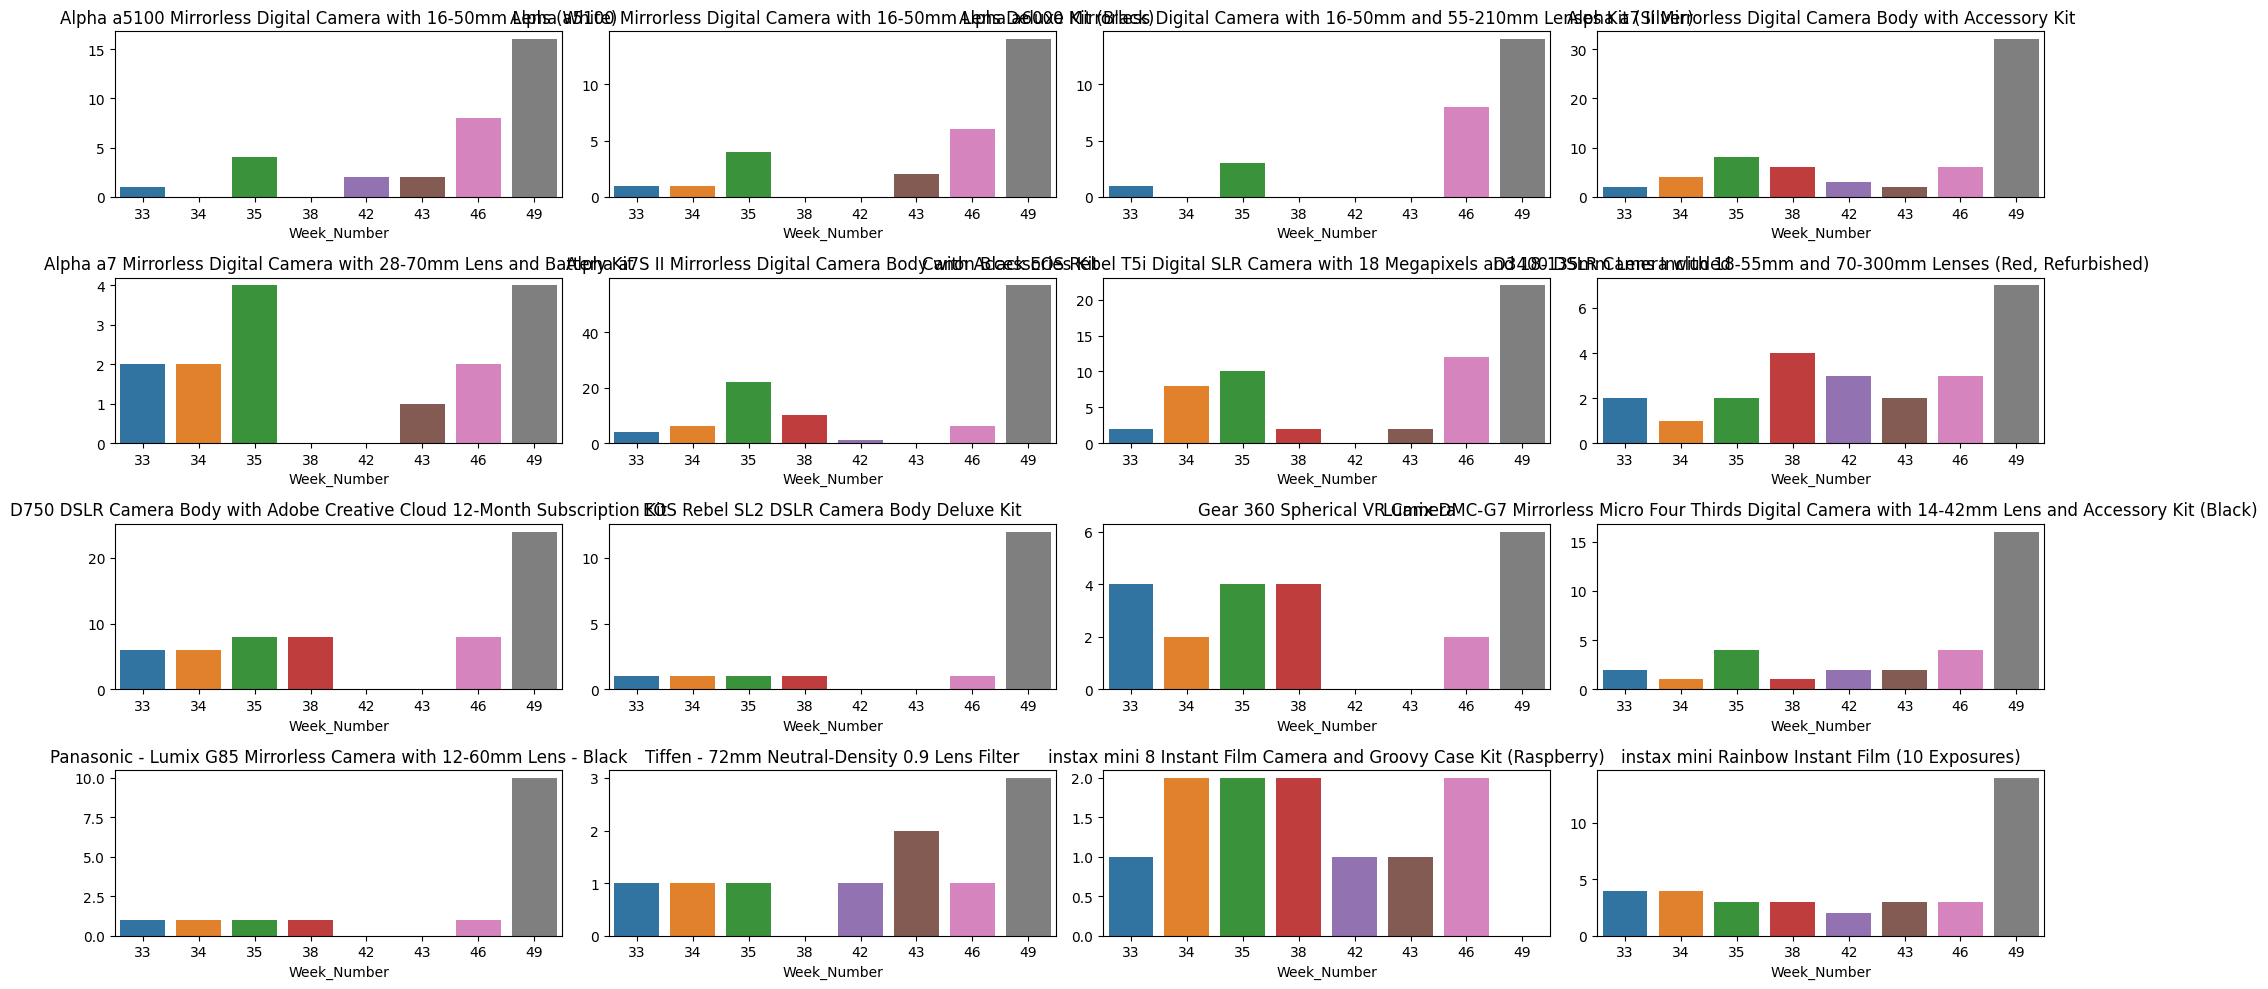

In [230]:
plt.figure(figsize=(20,10))

for k in np.arange(1,len(y_demand.columns)):
    plt.subplot(4,4,k)
    sns.barplot(x=y_demand['Week_Number'], y=y_demand[y_demand.columns[k]], data=y_demand)
    plt.title(a[k-1])
    plt.ylabel('')
    plt.tight_layout()

## 6.0 Machine Learning

### 6.1 Linear Regression for one product

In [231]:
x_camara = x_price['Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit']
y_camara = y_demand['Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit']
X_camara = sm.add_constant(x_camara)
model = sm.OLS(y_camara, X_camara)
results = model.fit()
print(results.summary())

                                                   OLS Regression Results                                                   
Dep. Variable:     Alpha a7S II Mirrorless Digital Camera Body with Accessories Kit   R-squared:                       0.066
Model:                                                                          OLS   Adj. R-squared:                 -0.090
Method:                                                               Least Squares   F-statistic:                    0.4235
Date:                                                              Fri, 22 Sep 2023   Prob (F-statistic):              0.539
Time:                                                                      23:18:15   Log-Likelihood:                -34.085
No. Observations:                                                                 8   AIC:                             72.17
Df Residuals:                                                                     6   BIC:                             72.33


c:\Users\Castrillo Lab\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### 6.2 Linear Regression for all columns

In [232]:
results_value_camara = {'name': [],
                        'price_elasticity': [],
                        'price_mean': [],
                        'quantity_mean': [],
                        'intercept': [],
                        'slope': [],
                        'rsquared': [],
                        'p_value': []}
##### create the dataframe
for column in x_price.columns[1:]: #start from 2nd column
    column_points = []
    for i in range(len(x_price[column])):
        column_points.append((x_price[column][i], y_demand[column][i]))
    df = pd.DataFrame(list(column_points), columns=['x_price', 'y_demand'])
    ######fitting model
    x_camara = df['x_price']
    y_camara = df['y_demand']
    X_camara = sm.add_constant(x_camara)
    model = sm.OLS(y_camara, X_camara)
    results = model.fit()
    
    ######statistics significance
    if results.f_pvalue < 0.05:
        rsquared = results.rsquared
        p_values = results.f_pvalue
        intercept, slope = results.params #slope: angular quotient (the inclination of the line that better descript the points)
        mean_price = np.mean(x_camara)
        mean_quantity = np.mean(y_camara)
        
        price_elasticity = slope * (mean_price/mean_quantity)
        
        results_value_camara['name'].append(column)
        results_value_camara['price_elasticity'].append(price_elasticity)
        results_value_camara['price_mean'].append(mean_price)
        results_value_camara['quantity_mean'].append(mean_quantity)
        results_value_camara['intercept'].append(intercept)
        results_value_camara['slope'].append(slope)
        results_value_camara['rsquared'].append(rsquared)
        results_value_camara['p_value'].append(p_values)
df_elasticity = pd.DataFrame.from_dict(results_value_camara)
        

In [233]:
df_elasticity

,name,price_elasticity,price_mean,quantity_mean,intercept,slope,rsquared,p_value
0,EOS Rebel SL2 DSLR Camera Body Deluxe Kit,90.152765,553.072708,2.125,-189.449625,0.346382,0.987344,6.365531e-07
1,Panasonic - Lumix G85 Mirrorless Camera with 1...,-98.229486,991.740000,1.875,186.055286,-0.185714,0.981417,2.019530e-06


## 7.0 Elasticity

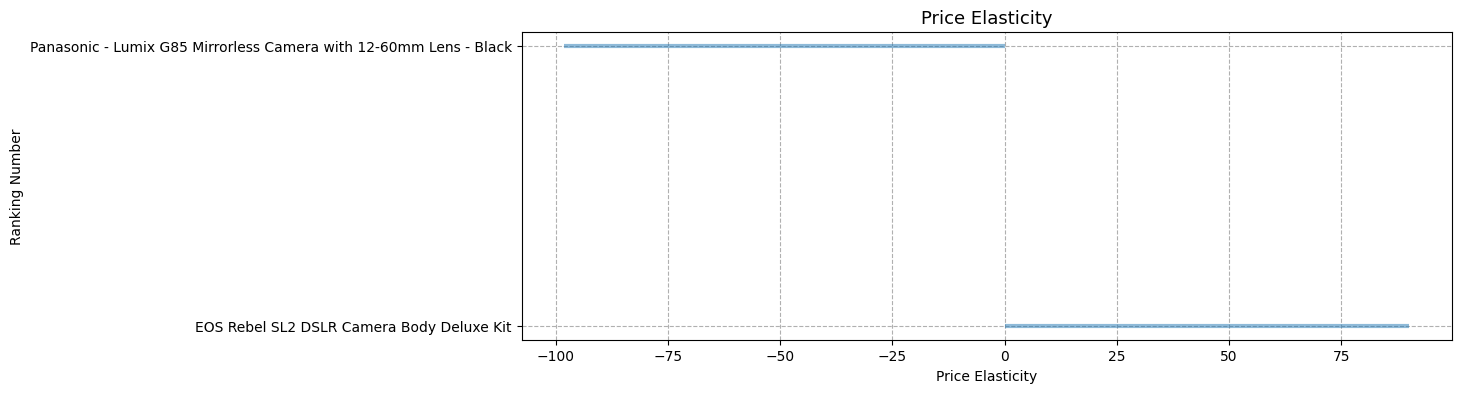

In [234]:
######create ranking column
df_elasticity['ranking'] = df_elasticity.loc[:,'price_elasticity'].rank(ascending=False).astype(int)
df_elasticity = df_elasticity.reset_index(drop=True)
plt.figure(figsize=(12,4))
plt.hlines(y=df_elasticity['name'], xmin=0, xmax=df_elasticity['price_elasticity'], alpha=0.5, linewidth=3)

#for name, p in zip(df_elasticity['name'], df_elasticity['ranking']):
    #plt.text(100,p, name)
    
#####add elasticity label
#for x, y, s in zip(df_elasticity['price_elasticity'], df_elasticity['ranking'], df_elasticity['price_elasticity']):
    #plt.text(x, y, round(s,2), horizontalalignment='right' if x <0 else 'left', 
                            #verticalalignment='center',
                            #fontdict={'color': 'red' if x < 0 else 'green', 'size':10})
    

plt.gca().set(ylabel= 'Ranking Number', xlabel= 'Price Elasticity')
plt.title('Price Elasticity', fontdict={'size': 13})
plt.grid(linestyle = '--')



In [235]:
######create a dataframe with the price elasticity
df_order_elasticity =df_elasticity[['ranking', 'name', 'price_elasticity']].sort_values('ranking', ascending=True)
df_order_elasticity

,ranking,name,price_elasticity
0,1,EOS Rebel SL2 DSLR Camera Body Deluxe Kit,90.152765
1,2,Panasonic - Lumix G85 Mirrorless Camera with 1...,-98.229486


## 8.0 Business Performance

In [236]:
results_revenue = {
    'name':[],
    'current_revenue':[],
    'reduction_revenue':[],
    'lost_revenue':[],
    'new_revenue':[],
    'revenue_variation':[],
    'percentage_revenue': []
    }

for i in range(len(df_order_elasticity)):
    current_average_price = x_price[df_order_elasticity['name'][i]].mean()
    current_demand = y_demand[df_order_elasticity['name'][i]].sum()
    
    price_reduction = current_average_price*0.9
    increase_demand = 0.1*abs(df_order_elasticity['price_elasticity'][i])
    
    new_demand = increase_demand*current_demand
    
    current_revenue = round(current_average_price*current_demand,2)
    new_revenue = round(price_reduction*new_demand,2)
    
    reduction_revenue = round(current_revenue*0.9,2)
    
    lost_revenue = round(current_revenue-reduction_revenue,2)
    
    revenue_variation = round(new_revenue-current_revenue,2)
    
    percentage_revenue = round((revenue_variation/current_revenue)*100,2)
    
    results_revenue['name'].append(df_order_elasticity['name'][i])
    results_revenue['current_revenue'].append(current_revenue)
    results_revenue['reduction_revenue'].append(reduction_revenue)
    results_revenue['lost_revenue'].append(lost_revenue)
    results_revenue['new_revenue'].append(new_revenue)
    results_revenue['revenue_variation'].append(revenue_variation)
    results_revenue['percentage_revenue'].append(percentage_revenue)

results = pd.DataFrame(results_revenue)

results 

,name,current_revenue,reduction_revenue,lost_revenue,new_revenue,revenue_variation,percentage_revenue
0,EOS Rebel SL2 DSLR Camera Body Deluxe Kit,9402.24,8462.02,940.22,76287.38,66885.14,711.37
1,Panasonic - Lumix G85 Mirrorless Camera with 1...,14876.10,13388.49,1487.61,131514.45,116638.35,784.07


In [237]:
round(results['new_revenue'].sum() - results['current_revenue'].sum(),2)

183523.49

In [238]:
######results
current_average_price = x_price['EOS Rebel SL2 DSLR Camera Body Deluxe Kit'].mean()
current_demand = y_demand['EOS Rebel SL2 DSLR Camera Body Deluxe Kit'].sum()
    
price_reduction = current_average_price*0.9
increase_demand = 0.1*abs(df_order_elasticity['price_elasticity'][0])
    
new_demand = increase_demand*current_demand
    
current_revenue = round(current_average_price*current_demand,2)
new_revenue = round(price_reduction*new_demand,2)
    
reduction_revenue = round(current_revenue*0.9,2)
    
lost_revenue = round(current_revenue-reduction_revenue,2)

print(f'For the camera EOS Rebel SL2 DSLR Camera Body Deluxe Kit, the current revenue stands at $ {round(current_revenue, 2)}. If we implement a suggested 10% reduction in prices, the revenue would decrease to $ {round(reduction_revenue, 2)}, resulting in an initial reduction of ${round(current_revenue-reduction_revenue, 2) }.')
print(f'However, this reduction in prices is expected to stimulate an increase in demand. As a result, the projected revenue would surge to $ {round(new_revenue, 2)}. This substantial uptick represents an impressive revenue increase of ${round(new_revenue-current_revenue, 2)} or a remarkable growth rate of {round(((new_revenue-current_revenue)/current_revenue)*100, 2)} %.')

For the camera EOS Rebel SL2 DSLR Camera Body Deluxe Kit, the current revenue stands at $ 9402.24. If we implement a suggested 10% reduction in prices, the revenue would decrease to $ 8462.02, resulting in an initial reduction of $940.22.
However, this reduction in prices is expected to stimulate an increase in demand. As a result, the projected revenue would surge to $ 76287.38. This substantial uptick represents an impressive revenue increase of $66885.14 or a remarkable growth rate of 711.37 %.


In [239]:
######results
current_average_price = x_price['Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black'].mean()
current_demand = y_demand['Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black'].sum()
    
price_reduction = current_average_price*0.9
increase_demand = 0.1*abs(df_order_elasticity['price_elasticity'][1])
    
new_demand = increase_demand*current_demand
    
current_revenue = round(current_average_price*current_demand,2)
new_revenue = round(price_reduction*new_demand,2)
    
reduction_revenue = round(current_revenue*0.9,2)
    
lost_revenue = round(current_revenue-reduction_revenue,2)

print(f'For the camera Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black, the current revenue stands at $ {round(current_revenue, 2)}. If we implement a suggested 10% reduction in prices, the revenue would decrease to $ {round(reduction_revenue, 2)}, resulting in an initial reduction of ${round(current_revenue-reduction_revenue, 2) }.')
print(f'However, this reduction in prices is expected to stimulate an increase in demand. As a result, the projected revenue would surge to $ {round(new_revenue, 2)}. This substantial uptick represents an impressive revenue increase of ${round(new_revenue-current_revenue, 2)} or a remarkable growth rate of {round(((new_revenue-current_revenue)/current_revenue)*100, 2)} %.')

For the camera Panasonic - Lumix G85 Mirrorless Camera with 12-60mm Lens - Black, the current revenue stands at $ 14876.1. If we implement a suggested 10% reduction in prices, the revenue would decrease to $ 13388.49, resulting in an initial reduction of $1487.61.
However, this reduction in prices is expected to stimulate an increase in demand. As a result, the projected revenue would surge to $ 131514.45. This substantial uptick represents an impressive revenue increase of $116638.35 or a remarkable growth rate of 784.07 %.
